**Датасет содержит данные по песням Taylor Swift на 2021 год.**

*Переменные*:

- **name** - название песни
- **album** - название альбома
- **artist** - исполнитель песни
- **release_date** - дата релиза альбома
- **length** - длительность песни в миллисекундах
- **popularity** - процент, отражающий популярность песни согласно алгоритмам Spotify (по числу прослушиваний (streams) на определенную дату)
- **danceability** - насколько песня танцевальная (признак основан на комбинации музыкальных элементов в песне, включая темп, стабильность ритма, силу ударов (битов) и в целом закономерность элементов)
- **acousticness** - насколько песня акустическая
- **energy** - насколько песня интенсивная и активная с точки зрения энергии
- **instrumentalness** - насколько в песне отсутствуют слова (в полностью инструментальных песнях нет слов)
- **liveness** - вероятность того, что песня была записана с живой аудиторией (т.е. во время живого выступления)
- **loudness** - тенденция того, что песня была записана стабильно на более высокой громкости
- **speechiness** - тенденция наличия слов в песне
- **valence** - мера того, насколько песня позитивная (чем ниже показатель, тем грустнее песня, и наоборот)
- **tempo** - число ударов (битов) в минуту

## <font color = green> 1. Фильтрация и сортировка данных </font>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# чтобы файл открылся по этому коду, его нужно загрузить в jupyter
df = pd.read_csv('spotify_taylorswift.csv')

In [3]:
df

Unnamed: 0                                               name  \
0             0                                         Tim McGraw   
1             1                                    Picture To Burn   
2             2        Teardrops On My Guitar - Radio Single Remix   
3             3                              A Place in this World   
4             4                                        Cold As You   
..          ...                                                ...   
166         166  Mr. Perfectly Fine (Taylor’s Version) (From Th...   
167         167  We Were Happy (Taylor’s Version) (From The Vault)   
168         168  That’s When (feat. Keith Urban) (Taylor’s Vers...   
169         169      Don’t You (Taylor’s Version) (From The Vault)   
170         170   Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album        artist release_date  length  \
0                   Taylor Swift  Taylor Swift   2006-10-24  232106   
1                   Taylor Swift  Taylor Swift   2006-10-24  173066   
2                   Taylor Swift  Taylor Swift   2006-10-24  203040   
3                   Taylor Swift  Taylor Swift   2006-10-24  199200   
4                   Taylor Swift  Taylor Swift   2006-10-24  239013   
..                           ...           ...          ...     ...   
166  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  277591   
167  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  244236   
168  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  189495   
169  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  208608   
170  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  242157   

     popularity  danceability  acousticness  energy  instrumentalness  \
0            49         0.580         0.575   0.491          0.000000   
1            54         0.658         0.173   0.877          0.000000   
2            59         0.621         0.288   0.417          0.000000   
3            49         0.576         0.051   0.777          0.000000   
4            50         0.418         0.217   0.482          0.000000   
..          ...           ...           ...     ...               ...   
166          74         0.660         0.162   0.817          0.000000   
167          65         0.609         0.849   0.373          0.000000   
168          67         0.588         0.225   0.608          0.000000   
169          66         0.563         0.514   0.473          0.000012   
170          64         0.624         0.334   0.624          0.000000   

     liveness  loudness  speechiness  valence    tempo  
0      0.1210    -6.462       0.0251    0.425   76.009  
1      0.0962    -2.098       0.0323    0.821  105.586  
2      0.1190    -6.941       0.0231    0.289   99.953  
3      0.3200    -2.881       0.0324    0.428  115.028  
4      0.1230    -5.769       0.0266    0.261  175.558  
..        ...       ...          ...      ...      ...  
166    0.0667    -6.269       0.0521    0.714  135.942  
167    0.0779    -8.819       0.0263    0.130  106.007  
168    0.0920    -7.062       0.0365    0.508   90.201  
169    0.1090   -11.548       0.0503    0.405  101.934  
170    0.0995    -7.860       0.0539    0.527   80.132  

[171 rows x 16 columns]

In [4]:
print(df.shape)

(171, 16)


Как можно заметить, файл с данными состоит из 171 строки и 16 столбцов.

Переименуем первый столбец - он не является смысловым, а просто указывает на порядок песни в списке.

In [5]:
df.rename(columns = {'Unnamed: 0': '№'}, inplace = True)

In [6]:
df.head()

№                                         name         album        artist  \
0  0                                   Tim McGraw  Taylor Swift  Taylor Swift   
1  1                              Picture To Burn  Taylor Swift  Taylor Swift   
2  2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift  Taylor Swift   
3  3                        A Place in this World  Taylor Swift  Taylor Swift   
4  4                                  Cold As You  Taylor Swift  Taylor Swift   

  release_date  length  popularity  danceability  acousticness  energy  \
0   2006-10-24  232106          49         0.580         0.575   0.491   
1   2006-10-24  173066          54         0.658         0.173   0.877   
2   2006-10-24  203040          59         0.621         0.288   0.417   
3   2006-10-24  199200          49         0.576         0.051   0.777   
4   2006-10-24  239013          50         0.418         0.217   0.482   

   instrumentalness  liveness  loudness  speechiness  valence    tempo  
0               0.0    0.1210    -6.462       0.0251    0.425   76.009  
1               0.0    0.0962    -2.098       0.0323    0.821  105.586  
2               0.0    0.1190    -6.941       0.0231    0.289   99.953  
3               0.0    0.3200    -2.881       0.0324    0.428  115.028  
4               0.0    0.1230    -5.769       0.0266    0.261  175.558

In [7]:
df.tail(3)

№                                               name  \
168  168  That’s When (feat. Keith Urban) (Taylor’s Vers...   
169  169      Don’t You (Taylor’s Version) (From The Vault)   
170  170   Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album        artist release_date  length  \
168  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  189495   
169  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  208608   
170  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  242157   

     popularity  danceability  acousticness  energy  instrumentalness  \
168          67         0.588         0.225   0.608          0.000000   
169          66         0.563         0.514   0.473          0.000012   
170          64         0.624         0.334   0.624          0.000000   

     liveness  loudness  speechiness  valence    tempo  
168    0.0920    -7.062       0.0365    0.508   90.201  
169    0.1090   -11.548       0.0503    0.405  101.934  
170    0.0995    -7.860       0.0539    0.527   80.132

In [8]:
df.iloc[55:58]

№                                   name                 album  \
55  55                           Girl At Home  Red (Deluxe Edition)   
56  56  Treacherous - Original Demo Recording  Red (Deluxe Edition)   
57  57          Red - Original Demo Recording  Red (Deluxe Edition)   

          artist release_date  length  popularity  danceability  acousticness  \
55  Taylor Swift   2012-10-22  220840          55         0.733         0.272   
56  Taylor Swift   2012-10-22  240266          53         0.828         0.175   
57  Taylor Swift   2012-10-22  227080          53         0.678         0.113   

    energy  instrumentalness  liveness  loudness  speechiness  valence  \
55   0.590          0.000000    0.1340    -5.860       0.0284    0.633   
56   0.640          0.000061    0.0991    -8.248       0.0355    0.519   
57   0.902          0.000235    0.0705    -4.659       0.0358    0.637   

      tempo  
55  125.048  
56  109.993  
57  124.998

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   №                 171 non-null    int64  
 1   name              171 non-null    object 
 2   album             171 non-null    object 
 3   artist            171 non-null    object 
 4   release_date      171 non-null    object 
 5   length            171 non-null    int64  
 6   popularity        171 non-null    int64  
 7   danceability      171 non-null    float64
 8   acousticness      171 non-null    float64
 9   energy            171 non-null    float64
 10  instrumentalness  171 non-null    float64
 11  liveness          171 non-null    float64
 12  loudness          171 non-null    float64
 13  speechiness       171 non-null    float64
 14  valence           171 non-null    float64
 15  tempo             171 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

In [10]:
df.isna().sum()

№                   0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
dtype: int64

Мы видим, что в данных **нет пропусков**.

In [11]:
df['album'].unique()

array(['Taylor Swift', 'Speak Now (Deluxe Package)',
       'Red (Deluxe Edition)', '1989 (Deluxe)', 'reputation', 'Lover',
       'folklore (deluxe version)', 'evermore (deluxe version)',
       "Fearless (Taylor's Version)"], dtype=object)

Мы посмотрели уникальные значения в переменной **album** - видим названия альбомов, песни из которых присутствуют в датасете.

Выведем песни из альбома Fearless (Taylor's Version).

In [12]:
df[df['album'] == "Fearless (Taylor's Version)"]

№                                               name  \
145  145                        Fearless (Taylor’s Version)   
146  146                         Fifteen (Taylor’s Version)   
147  147                      Love Story (Taylor’s Version)   
148  148                     Hey Stephen (Taylor’s Version)   
149  149                     White Horse (Taylor’s Version)   
150  150              You Belong With Me (Taylor’s Version)   
151  151  Breathe (feat. Colbie Caillat) (Taylor’s Version)   
152  152                     Tell Me Why (Taylor’s Version)   
153  153                You’re Not Sorry (Taylor’s Version)   
154  154             The Way I Loved You (Taylor’s Version)   
155  155                Forever & Always (Taylor’s Version)   
156  156                    The Best Day (Taylor’s Version)   
157  157                          Change (Taylor’s Version)   
158  158                  Jump Then Fall (Taylor’s Version)   
159  159                     Untouchable (Taylor’s Version)   
160  160  Forever & Always (Piano Version) (Taylor’s Ver...   
161  161           Come In With The Rain (Taylor’s Version)   
162  162                       Superstar (Taylor’s Version)   
163  163      The Other Side Of The Door (Taylor’s Version)   
164  164           Today Was A Fairytale (Taylor’s Version)   
165  165  You All Over Me (feat. Maren Morris) (Taylor’s...   
166  166  Mr. Perfectly Fine (Taylor’s Version) (From Th...   
167  167  We Were Happy (Taylor’s Version) (From The Vault)   
168  168  That’s When (feat. Keith Urban) (Taylor’s Vers...   
169  169      Don’t You (Taylor’s Version) (From The Vault)   
170  170   Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album        artist release_date  length  \
145  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  241591   
146  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  294419   
147  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  235766   
148  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  254254   
149  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  234515   
150  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  231124   
151  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  263377   
152  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  200575   
153  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  261842   
154  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  243136   
155  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  225328   
156  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  245290   
157  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  279359   
158  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  237580   
159  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  312107   
160  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  267833   
161  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  237338   
162  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  263865   
163  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  238443   
164  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  241822   
165  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  220839   
166  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  277591   
167  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  244236   
168  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  189495   
169  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  208608   
170  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  242157   

     popularity  danceability  acousticness  energy  instrumentalness  \
145          69         0.569      0.012200   0.741          0.000000   
146          66         0.559      0.116000   0.646          0.000000   
147          74         0.627      0.130000   0.792          0.000004   
148          66         0.788      0.106000   0.571          0.000000   
149          66       

In [13]:
df[df['album'] == "Fearless (Taylor's Version)"].shape

(26, 16)

Всего в альбоме Fearless (Taylor's Version) 26 песен.

In [14]:
df['popularity'].isna().shape

(171,)

Подтверждаем, что в переменной popularity нет пропусков.

Выведем песни, процент популярности которых составляет от 45 до 55.

In [15]:
df[df['popularity'].isin(range(45, 55))]

№                                   name                       album  \
0    0                             Tim McGraw                Taylor Swift   
1    1                        Picture To Burn                Taylor Swift   
3    3                  A Place in this World                Taylor Swift   
4    4                            Cold As You                Taylor Swift   
5    5                            The Outside                Taylor Swift   
6    6             Tied Together with a Smile                Taylor Swift   
7    7                         Stay Beautiful                Taylor Swift   
8    8                      Should've Said No                Taylor Swift   
9    9              Mary's Song (Oh My My My)                Taylor Swift   
10  10                               Our Song                Taylor Swift   
11  11          I'm Only Me When I'm With You                Taylor Swift   
12  12                              Invisible                Taylor Swift   
13  13                 A Perfectly Good Heart                Taylor Swift   
14  14   Teardrops on My Guitar - Pop Version                Taylor Swift   
15  15                         Mine - POP Mix  Speak Now (Deluxe Package)   
16  16                             Sparks Fly  Speak Now (Deluxe Package)   
17  17                       Back To December  Speak Now (Deluxe Package)   
18  18                              Speak Now  Speak Now (Deluxe Package)   
19  19                              Dear John  Speak Now (Deluxe Package)   
20  20                                   Mean  Speak Now (Deluxe Package)   
21  21                        The Story Of Us  Speak Now (Deluxe Package)   
23  23                              Enchanted  Speak Now (Deluxe Package)   
24  24                    Better Than Revenge  Speak Now (Deluxe Package)   
26  26                                Haunted  Speak Now (Deluxe Package)   
27  27                              Last Kiss  Speak Now (Deluxe Package)   
28  28                              Long Live  Speak Now (Deluxe Package)   
30  30                    If This Was A Movie  Speak Now (Deluxe Package)   
31  31                               Superman  Speak Now (Deluxe Package)   
33  33             Haunted - Acoustic Version  Speak Now (Deluxe Package)   
56  56  Treacherous - Original Demo Recording        Red (Deluxe Edition)   
57  57          Red - Original Demo Recording        Red (Deluxe Edition)   

          artist release_date  length  popularity  danceability  acousticness  \
0   Taylor Swift   2006-10-24  232106          49         0.580      0.575000   
1   Taylor Swift   2006-10-24  173066          54         0.658      0.173000   
3   Taylor Swift   2006-10-24  199200          49         0.576      0.051000   
4   Taylor Swift   2006-10-24  239013          50         0.418      0.217000   
5   Taylor Swift   2006-10-24  207106          47         0.589      0.004910   
6   Taylor Swift   2006-10-24  248106          47         0.479      0.525000   
7   Taylor Swift   2006-10-24  236053          48         0.594      0.086800   
8   Taylor Swift   2006-10-24  242200          53         0.476      0.010300   
9   Taylor Swift   2006-10-24  213080          50         0.403      0.017700   
10  Taylor Swift   2006-10-24  201106          54         0.668      0.111000   
11  Taylor Swift   2006-10-24  213053          50         0.563      0.004520   
12  Taylor Swift   2006-10-24  203226          48         0.612      0.637000   
13  Taylor Swift   2006-10-24  220146          46         0.483      0.003490   
14  Taylor Swift   2006-10-24  179066          48         0.459      0.040200   
15  Taylor Swift   2010-01-01  230546          45         0.696      0.004610   
16  Taylor Swift   2010-01-01  260946          50         0.608      0.038700   
17  Taylor Swift   2010-01-01  293040          50         0.517      0.020200   
18  Taylor Swift   2010-01-01  240773          49         0.708      0.101000   
1

In [16]:
df['popularity'].sort_values()

75      0
77      0
76      0
35     43
22     44
       ..
82     78
106    78
95     80
64     80
60     82
Name: popularity, Length: 171, dtype: int64

In [17]:
df['popularity'].sort_values(ascending = False)

60     82
64     80
95     80
82     78
106    78
       ..
22     44
35     43
76      0
75      0
77      0
Name: popularity, Length: 171, dtype: int64

In [18]:
df['popularity'].max()

82

In [19]:
df['popularity'].min()

0

Отсортируем датасет по популярности песен (от наиболее популярных к менее популярным).

In [20]:
df.sort_values(by=['popularity'], ascending = False)

№                           name                       album  \
60    60                    Blank Space               1989 (Deluxe)   
64    64                   Shake It Off               1989 (Deluxe)   
95    95                          Lover                       Lover   
82    82                       Delicate                  reputation   
106  106          You Need To Calm Down                       Lover   
..   ...                            ...                         ...   
22    22                  Never Grow Up  Speak Now (Deluxe Package)   
35    35               Back To December  Speak Now (Deluxe Package)   
76    76  I Wish You Would - Voice Memo               1989 (Deluxe)   
75    75     I Know Places - Voice Memo               1989 (Deluxe)   
77    77       Blank Space - Voice Memo               1989 (Deluxe)   

           artist release_date  length  popularity  danceability  \
60   Taylor Swift   2014-01-01  231826          82         0.760   
64   Taylor Swift   2014-01-01  219200          80         0.647   
95   Taylor Swift   2019-08-23  221306          80         0.359   
82   Taylor Swift   2017-11-10  232253          78         0.750   
106  Taylor Swift   2019-08-23  171360          78         0.771   
..            ...          ...     ...         ...           ...   
22   Taylor Swift   2010-01-01  290480          44         0.715   
35   Taylor Swift   2010-01-01  293040          43         0.525   
76   Taylor Swift   2014-01-01  107133           0         0.781   
75   Taylor Swift   2014-01-01  216333           0         0.592   
77   Taylor Swift   2014-01-01  131186           0         0.675   

     acousticness  energy  instrumentalness  liveness  loudness  speechiness  \
60        0.10300   0.703          0.000000    0.0913    -5.412       0.0540   
64        0.06470   0.800          0.000000    0.3340    -5.384       0.1650   
95        0.49200   0.543          0.000016    0.1180    -7.582       0.0919   
82        0.21600   0.404          0.000357    0.0911   -10.178       0.0682   
106       0.00929   0.671          0.000000    0.0637    -5.617       0.0553   
..            ...     ...               ...       ...       ...          ...   
22        0.82900   0.308          0.000000    0.1600    -8.829       0.0305   
35        0.11300   0.676          0.000000    0.2940    -4.684       0.0294   
76        0.71700   0.357          0.000000    0.1850   -16.394       0.9120   
75        0.82900   0.128          0.000000    0.5270   -17.932       0.5890   
77        0.80100   0.234          0.000000    0.6570   -15.064       0.7210   

     valence    tempo  
60    0.5700   95.997  
64    0.9420  160.078  
95    0.4530   68.534  
82    0.0499   95.045  
106   0.7140   85.026  
..       ...      ...  
22    0.5470  124.899  
35    0.2810  141.950  
76    0.6450  118.317  
75    0.1500   78.828  
77    0.5780  127.296  

[171 rows x 16 columns]

Можем заметить, что наиболее популярными песнями являются синглы, что неудивительно. Также не удивляет, что первые 2 места занимают синглы Blank Space и Shake It Off из альбома 1989 (Deluxe), который называют одним из самых успешных альбомов Тейлор.

**Сделаем сортировку по двум признакам:** название альбома и популярность песни. По первому признаку будет сортировка по алфавиту (+ числовые значения идут впереди), а по второму признаку песни будут идти от наиболее популярных к наименее популярным (в рамках альбома).

In [21]:
df.sort_values(by=['album', 'popularity'], ascending=[True, False])

№                                   name          album        artist  \
60  60                            Blank Space  1989 (Deluxe)  Taylor Swift   
64  64                           Shake It Off  1989 (Deluxe)  Taylor Swift   
61  61                                  Style  1989 (Deluxe)  Taylor Swift   
62  62                       Out Of The Woods  1989 (Deluxe)  Taylor Swift   
74  74                          New Romantics  1989 (Deluxe)  Taylor Swift   
..  ..                                    ...            ...           ...   
87  87                       King Of My Heart     reputation  Taylor Swift   
88  88            Dancing With Our Hands Tied     reputation  Taylor Swift   
90  90  This Is Why We Can't Have Nice Things     reputation  Taylor Swift   
92  92                         New Year’s Day     reputation  Taylor Swift   
84  84                          So It Goes...     reputation  Taylor Swift   

   release_date  length  popularity  danceability  acousticness  energy  \
60   2014-01-01  231826          82         0.760      0.103000   0.703   
64   2014-01-01  219200          80         0.647      0.064700   0.800   
61   2014-01-01  231000          75         0.588      0.002450   0.791   
62   2014-01-01  235800          67         0.553      0.000743   0.841   
74   2014-01-01  230466          66         0.633      0.004630   0.889   
..          ...     ...         ...           ...           ...     ...   
87   2017-11-10  214320          69         0.675      0.008820   0.703   
88   2017-11-10  211506          68         0.624      0.060400   0.691   
90   2017-11-10  207133          68         0.567      0.015600   0.789   
92   2017-11-10  235466          67         0.661      0.921000   0.151   
84   2017-11-10  227906          66         0.574      0.122000   0.610   

    instrumentalness  liveness  loudness  speechiness  valence    tempo  
60          0.000000    0.0913    -5.412       0.0540    0.570   95.997  
64          0.000000    0.3340    -5.384       0.1650    0.942  160.078  
61          0.002580    0.1180    -5.595       0.0402    0.487   94.933  
62          0.000012    0.3410    -6.937       0.0396    0.338   92.008  
74          0.000458    0.0658    -5.870       0.0715    0.584  121.956  
..               ...       ...       ...          ...      ...      ...  
87          0.000002    0.0391    -7.902       0.0382    0.314  110.010  
88          0.000011    0.1380    -6.686       0.1960    0.284  160.024  
90          0.000000    0.3820    -5.986       0.1150    0.438  163.960  
92          0.000000    0.1300   -12.864       0.0354    0.230   94.922  
84          0.000001    0.1300    -7.283       0.0732    0.374   74.957  

[171 rows x 16 columns]

*NOTE:* Опытным путем было выяснено, что поскольку названия альбомов evermore, folklore и reputation пишутся с маленькой буквы, сортировка по алфавиту "ломается" - сначала сортируются группы названий с большой буквы, а потом группы названий с маленькой. Поэтому сейчас мы сделаем так, чтобы названия альбомов evermore, folklore и reputation также писались с большой буквы.

In [22]:
df['album'] = df['album'].replace(['evermore (deluxe version)', 'folklore (deluxe version)', 'reputation'], 
                                       ['Evermore (Deluxe Version)', 'Folklore (Deluxe Version)', 'Reputation'])

# код взят с сайта https://datatofish.com/replace-values-pandas-dataframe/

Делаем сортировку после исправления:

In [23]:
df.sort_values(by=['album', 'popularity'], ascending=[True, False])

№                                  name          album        artist  \
60  60                           Blank Space  1989 (Deluxe)  Taylor Swift   
64  64                          Shake It Off  1989 (Deluxe)  Taylor Swift   
61  61                                 Style  1989 (Deluxe)  Taylor Swift   
62  62                      Out Of The Woods  1989 (Deluxe)  Taylor Swift   
74  74                         New Romantics  1989 (Deluxe)  Taylor Swift   
..  ..                                   ...            ...           ...   
12  12                             Invisible   Taylor Swift  Taylor Swift   
14  14  Teardrops on My Guitar - Pop Version   Taylor Swift  Taylor Swift   
5    5                           The Outside   Taylor Swift  Taylor Swift   
6    6            Tied Together with a Smile   Taylor Swift  Taylor Swift   
13  13                A Perfectly Good Heart   Taylor Swift  Taylor Swift   

   release_date  length  popularity  danceability  acousticness  energy  \
60   2014-01-01  231826          82         0.760      0.103000   0.703   
64   2014-01-01  219200          80         0.647      0.064700   0.800   
61   2014-01-01  231000          75         0.588      0.002450   0.791   
62   2014-01-01  235800          67         0.553      0.000743   0.841   
74   2014-01-01  230466          66         0.633      0.004630   0.889   
..          ...     ...         ...           ...           ...     ...   
12   2006-10-24  203226          48         0.612      0.637000   0.394   
14   2006-10-24  179066          48         0.459      0.040200   0.753   
5    2006-10-24  207106          47         0.589      0.004910   0.805   
6    2006-10-24  248106          47         0.479      0.525000   0.578   
13   2006-10-24  220146          46         0.483      0.003490   0.751   

    instrumentalness  liveness  loudness  speechiness  valence    tempo  
60          0.000000    0.0913    -5.412       0.0540    0.570   95.997  
64          0.000000    0.3340    -5.384       0.1650    0.942  160.078  
61          0.002580    0.1180    -5.595       0.0402    0.487   94.933  
62          0.000012    0.3410    -6.937       0.0396    0.338   92.008  
74          0.000458    0.0658    -5.870       0.0715    0.584  121.956  
..               ...       ...       ...          ...      ...      ...  
12          0.000000    0.1470    -5.723       0.0243    0.233   96.001  
14          0.000000    0.0863    -3.827       0.0537    0.483  199.997  
5           0.000000    0.2400    -4.055       0.0293    0.591  112.982  
6           0.000000    0.0841    -4.963       0.0294    0.192  146.165  
13          0.000000    0.1280    -5.726       0.0365    0.268  156.092  

[171 rows x 16 columns]

## <font color = green> 2. Создание новых переменных </font>

На мой взгляд, столбец artist можно удалить, поскольку он полностью состоит из значений "Taylor Swift".\
**NOTE:** в альбомах значение "Taylor Swift" останется, поскольку дебютный альбом Тейлор называется именно так.

In [24]:
df['artist'].unique()

array(['Taylor Swift'], dtype=object)

In [25]:
del df['artist']

In [26]:
df.head(4)

№                                         name         album release_date  \
0  0                                   Tim McGraw  Taylor Swift   2006-10-24   
1  1                              Picture To Burn  Taylor Swift   2006-10-24   
2  2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   2006-10-24   
3  3                        A Place in this World  Taylor Swift   2006-10-24   

   length  popularity  danceability  acousticness  energy  instrumentalness  \
0  232106          49         0.580         0.575   0.491               0.0   
1  173066          54         0.658         0.173   0.877               0.0   
2  203040          59         0.621         0.288   0.417               0.0   
3  199200          49         0.576         0.051   0.777               0.0   

   liveness  loudness  speechiness  valence    tempo  
0    0.1210    -6.462       0.0251    0.425   76.009  
1    0.0962    -2.098       0.0323    0.821  105.586  
2    0.1190    -6.941       0.0231    0.289   99.953  
3    0.3200    -2.881       0.0324    0.428  115.028

In [27]:
df.tail(2)

№                                              name  \
169  169     Don’t You (Taylor’s Version) (From The Vault)   
170  170  Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album release_date  length  popularity  \
169  Fearless (Taylor's Version)   2021-04-09  208608          66   
170  Fearless (Taylor's Version)   2021-04-09  242157          64   

     danceability  acousticness  energy  instrumentalness  liveness  loudness  \
169         0.563         0.514   0.473          0.000012    0.1090   -11.548   
170         0.624         0.334   0.624          0.000000    0.0995    -7.860   

     speechiness  valence    tempo  
169       0.0503    0.405  101.934  
170       0.0539    0.527   80.132

Переведем дату релиза альбома в специальный формат данных, обозначающий время, а не строку.

In [28]:
pd.to_datetime(df['release_date'])

0     2006-10-24
1     2006-10-24
2     2006-10-24
3     2006-10-24
4     2006-10-24
         ...    
166   2021-04-09
167   2021-04-09
168   2021-04-09
169   2021-04-09
170   2021-04-09
Name: release_date, Length: 171, dtype: datetime64[ns]

In [29]:
pd.to_datetime(df['release_date']).dt.day

0      24
1      24
2      24
3      24
4      24
       ..
166     9
167     9
168     9
169     9
170     9
Name: release_date, Length: 171, dtype: int64

In [30]:
pd.to_datetime(df['release_date']).dt.month

0      10
1      10
2      10
3      10
4      10
       ..
166     4
167     4
168     4
169     4
170     4
Name: release_date, Length: 171, dtype: int64

In [31]:
pd.to_datetime(df['release_date']).dt.year

0      2006
1      2006
2      2006
3      2006
4      2006
       ... 
166    2021
167    2021
168    2021
169    2021
170    2021
Name: release_date, Length: 171, dtype: int64

Мы убедились, что pandas правильно распознает день, месяц и год релиза.

In [32]:
df['release_date'] = pd.to_datetime(df['release_date'])

Выведем список песен, вышедших в **ноябре**.

In [33]:
df[df['release_date'].dt.month == 11]

№                                   name       album release_date  \
78  78                       ...Ready For It?  Reputation   2017-11-10   
79  79                               End Game  Reputation   2017-11-10   
80  80                    I Did Something Bad  Reputation   2017-11-10   
81  81                         Don’t Blame Me  Reputation   2017-11-10   
82  82                               Delicate  Reputation   2017-11-10   
83  83               Look What You Made Me Do  Reputation   2017-11-10   
84  84                          So It Goes...  Reputation   2017-11-10   
85  85                               Gorgeous  Reputation   2017-11-10   
86  86                            Getaway Car  Reputation   2017-11-10   
87  87                       King Of My Heart  Reputation   2017-11-10   
88  88            Dancing With Our Hands Tied  Reputation   2017-11-10   
89  89                                  Dress  Reputation   2017-11-10   
90  90  This Is Why We Can't Have Nice Things  Reputation   2017-11-10   
91  91                  Call It What You Want  Reputation   2017-11-10   
92  92                         New Year’s Day  Reputation   2017-11-10   

    length  popularity  danceability  acousticness  energy  instrumentalness  \
78  208186          74         0.613       0.05270   0.764          0.000000   
79  244826          72         0.649       0.00845   0.589          0.000000   
80  238253          74         0.696       0.06790   0.602          0.000021   
81  236413          75         0.615       0.10600   0.534          0.000018   
82  232253          78         0.750       0.21600   0.404          0.000357   
83  211853          77         0.766       0.20400   0.709          0.000014   
84  227906          66         0.574       0.12200   0.610          0.000001   
85  209680          72         0.800       0.07130   0.535          0.000009   
86  233626          76         0.562       0.00465   0.689          0.000002   
87  214320          69         0.675       0.00882   0.703          0.000002   
88  211506          68         0.624       0.06040   0.691          0.000011   
89  230373          71         0.719       0.03290   0.469          0.000000   
90  207133          68         0.567       0.01560   0.789          0.000000   
91  203506          71         0.598       0.18600   0.504          0.000221   
92  235466          67         0.661       0.92100   0.151          0.000000   

    liveness  loudness  speechiness  valence    tempo  
78    0.1970    -6.509       0.1360   0.4170  160.015  
79    0.1080    -6.237       0.0558   0.1510  159.073  
80    0.0696    -6.156       0.1590   0.3050   82.989  
81    0.0607    -6.719       0.0386   0.1930  135.917  
82    0.0911   -10.178       0.0682   0.0499   95.045  
83    0.1260    -6.471       0.1230   0.5060  128.070  
84    0.1300    -7.283       0.0732   0.3740   74.957  
85    0.2130    -6.684       0.1350   0.4510   92.027  
86    0.0888    -6.745       0.1270   0.3510  172.054  
87    0.0391    -7.902       0.0382   0.3140  110.010  
88    0.1380    -6.686       0.1960   0.2840  160.024  
89    0.1690    -8.792       0.0533   0.0851  120.085  
90    0.3820    -5.986       0.1150   0.4380  163.960  
91    0.3400    -9.874       0.0731   0.2520  163.954  
92    0.1300   -12.864       0.0354   0.2300   94.922

Посмотрим, какие песни вышли во **вторник**.

In [34]:
df[df['release_date'].dt.day_name() == 'Tuesday']

№                                         name  \
0      0                                   Tim McGraw   
1      1                              Picture To Burn   
2      2  Teardrops On My Guitar - Radio Single Remix   
3      3                        A Place in this World   
4      4                                  Cold As You   
5      5                                  The Outside   
6      6                   Tied Together with a Smile   
7      7                               Stay Beautiful   
8      8                            Should've Said No   
9      9                    Mary's Song (Oh My My My)   
10    10                                     Our Song   
11    11                I'm Only Me When I'm With You   
12    12                                    Invisible   
13    13                       A Perfectly Good Heart   
14    14         Teardrops on My Guitar - Pop Version   
111  111                                        the 1   
112  112                                     cardigan   
113  113              the last great american dynasty   
114  114                       exile (feat. Bon Iver)   
115  115                            my tears ricochet   
116  116                                   mirrorball   
117  117                                        seven   
118  118                                       august   
119  119                            this is me trying   
120  120                              illicit affairs   
121  121                             invisible string   
122  122                                    mad woman   
123  123                                     epiphany   
124  124                                        betty   
125  125                                        peace   
126  126                                         hoax   
127  127                      the lakes - bonus track   

                         album release_date  length  popularity  danceability  \
0                 Taylor Swift   2006-10-24  232106          49         0.580   
1                 Taylor Swift   2006-10-24  173066          54         0.658   
2                 Taylor Swift   2006-10-24  203040          59         0.621   
3                 Taylor Swift   2006-10-24  199200          49         0.576   
4                 Taylor Swift   2006-10-24  239013          50         0.418   
5                 Taylor Swift   2006-10-24  207106          47         0.589   
6                 Taylor Swift   2006-10-24  248106          47         0.479   
7                 Taylor Swift   2006-10-24  236053          48         0.594   
8                 Taylor Swift   2006-10-24  242200          53         0.476   
9                 Taylor Swift   2006-10-24  213080          50         0.403   
10                Taylor Swift   2006-10-24  201106          54         0.668   
11                Taylor Swift   2006-10-24  213053          50         0.563   
12                Taylor Swift   2006-10-24  203226          48         0.612   
13                Taylor Swift   2006-10-24  220146          46         0.483   
14                Taylor Swift   2006-10-24  179066          48         0.459   
111  Folklore (Deluxe Version)   2020-08-18  210240          64         0.780   
112  Folklore (Deluxe Version)   2020-08-18  239560          65         0.612   
113  Folklore (Deluxe Version)   2020-08-18  231000          63         0.688   
114  Folklore (Deluxe Version)   2020-08-18  285640          64         0.310   
115  Folklore (Deluxe Version)   2020-08-18  255893          64         0.456   
116  Folklore (Deluxe Version)   2020-08-18  208973          63         0.549   
117  Folklore (Deluxe Version)   2020-08-18  208906          62         0.602   
118  Folklore (Deluxe Version)   2020-08-18  261920          65         0.387   
119  Folklore (Deluxe Version)   2020-08-18  195106          63         0.511   
120  Folklore (Deluxe Version)   2020-08-18  190893          62         0.529   
121  Folklore (Delu

Создадим бинарную переменную **long_song**, которая будет принимать значение 1, если длительность песни дольше 4 минут (24000 миллисекунд) и 0 в обратном случае. Предположим, что если она дольше трех минут, то ее популярность будет ниже, чем популярность песен, длительность которых не превышает 4 минут.

In [35]:
df['length'].apply(lambda x:1 if x >=240000 else 0)

0      0
1      0
2      0
3      0
4      0
      ..
166    1
167    1
168    0
169    0
170    1
Name: length, Length: 171, dtype: int64

Проверим, что все работает (выведем последние значения, т.к. в первых пяти все песни короткие).

In [36]:
df.tail()

№                                               name  \
166  166  Mr. Perfectly Fine (Taylor’s Version) (From Th...   
167  167  We Were Happy (Taylor’s Version) (From The Vault)   
168  168  That’s When (feat. Keith Urban) (Taylor’s Vers...   
169  169      Don’t You (Taylor’s Version) (From The Vault)   
170  170   Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album release_date  length  popularity  \
166  Fearless (Taylor's Version)   2021-04-09  277591          74   
167  Fearless (Taylor's Version)   2021-04-09  244236          65   
168  Fearless (Taylor's Version)   2021-04-09  189495          67   
169  Fearless (Taylor's Version)   2021-04-09  208608          66   
170  Fearless (Taylor's Version)   2021-04-09  242157          64   

     danceability  acousticness  energy  instrumentalness  liveness  loudness  \
166         0.660         0.162   0.817          0.000000    0.0667    -6.269   
167         0.609         0.849   0.373          0.000000    0.0779    -8.819   
168         0.588         0.225   0.608          0.000000    0.0920    -7.062   
169         0.563         0.514   0.473          0.000012    0.1090   -11.548   
170         0.624         0.334   0.624          0.000000    0.0995    -7.860   

     speechiness  valence    tempo  
166       0.0521    0.714  135.942  
167       0.0263    0.130  106.007  
168       0.0365    0.508   90.201  
169       0.0503    0.405  101.934  
170       0.0539    0.527   80.132

Поскольку все работает, создаем непосредственно переменную **long_song** и проверяем ее наличие в датасете.

In [37]:
df['long_song'] = df['length'].apply(lambda x:1 if x >=240000 else 0)

In [38]:
df.head(2)

№             name         album release_date  length  popularity  \
0  0       Tim McGraw  Taylor Swift   2006-10-24  232106          49   
1  1  Picture To Burn  Taylor Swift   2006-10-24  173066          54   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.580         0.575   0.491               0.0    0.1210    -6.462   
1         0.658         0.173   0.877               0.0    0.0962    -2.098   

   speechiness  valence    tempo  long_song  
0       0.0251    0.425   76.009          0  
1       0.0323    0.821  105.586          0

Теперь создадим **категориальную переменную из переменной danceability**. У нас будет 3 категории: наименее танцевальная, умеренно-танцевальная и наиболее танцевальная.

In [39]:
df['danceability'].sort_values()

97     0.292
114    0.310
127    0.313
132    0.316
123    0.317
       ...  
100    0.811
71     0.815
101    0.824
56     0.828
98     0.897
Name: danceability, Length: 171, dtype: float64

In [40]:
df['danceability'].describe()

count    171.000000
mean       0.588632
std        0.115067
min        0.292000
25%        0.527000
50%        0.593000
75%        0.655500
max        0.897000
Name: danceability, dtype: float64

<AxesSubplot:>

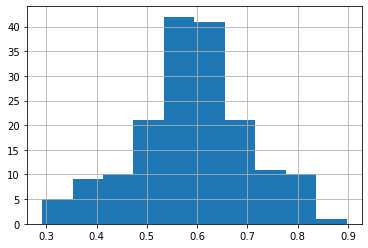

In [41]:
df['danceability'].hist()

Можем составить следующую функцию:

In [42]:
def dance_cat(danceability):
    if danceability <= 0.4: 
        return 'наименее танцевальная'
    elif danceability <= 0.65:
        return 'умеренно-танцевальная'
    elif danceability <= 1:
        return 'наиболее танцевальная'
    else:
        return danceability

In [43]:
df['danceability'].apply(dance_cat)

0      умеренно-танцевальная
1      наиболее танцевальная
2      умеренно-танцевальная
3      умеренно-танцевальная
4      умеренно-танцевальная
               ...          
166    наиболее танцевальная
167    умеренно-танцевальная
168    умеренно-танцевальная
169    умеренно-танцевальная
170    умеренно-танцевальная
Name: danceability, Length: 171, dtype: object

In [44]:
df['danceability_cat'] = df['danceability'].apply(dance_cat)

In [45]:
df['danceability_cat'].value_counts()

умеренно-танцевальная    115
наиболее танцевальная     45
наименее танцевальная     11
Name: danceability_cat, dtype: int64

Можно заметить, что большинство песен Тейлор умеренно-танцевальные, также в ее дискографии присутствует 45 наиболее танцевальных песен. Меньше всего у нее наименее танцевальных песен.

Мы видим, что тип переменной **danceability_cat** - int64. Сделаем ее категориальной.

In [46]:
df['danceability_cat'] = pd.Categorical(df['danceability_cat'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   №                 171 non-null    int64         
 1   name              171 non-null    object        
 2   album             171 non-null    object        
 3   release_date      171 non-null    datetime64[ns]
 4   length            171 non-null    int64         
 5   popularity        171 non-null    int64         
 6   danceability      171 non-null    float64       
 7   acousticness      171 non-null    float64       
 8   energy            171 non-null    float64       
 9   instrumentalness  171 non-null    float64       
 10  liveness          171 non-null    float64       
 11  loudness          171 non-null    float64       
 12  speechiness       171 non-null    float64       
 13  valence           171 non-null    float64       
 14  tempo             171 non-

In [48]:
df['danceability_cat']

0      умеренно-танцевальная
1      наиболее танцевальная
2      умеренно-танцевальная
3      умеренно-танцевальная
4      умеренно-танцевальная
               ...          
166    наиболее танцевальная
167    умеренно-танцевальная
168    умеренно-танцевальная
169    умеренно-танцевальная
170    умеренно-танцевальная
Name: danceability_cat, Length: 171, dtype: category
Categories (3, object): ['наиболее танцевальная', 'наименее танцевальная', 'умеренно-танцевальная']

Проверим, что переменная **danceability_cat** имеет 2 "составляющие": кодовую (числовую) и категориальную части.

In [49]:
df['danceability_cat'].cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
166    0
167    2
168    2
169    2
170    2
Length: 171, dtype: int8

In [50]:
df['danceability_cat'].cat.categories

Index(['наиболее танцевальная', 'наименее танцевальная',
       'умеренно-танцевальная'],
      dtype='object')

Сделаем **бинарную переменную**, с помощью которой мы сможем выделить **наиболее популярные песни Тейлор Свифт**.

In [51]:
df['popularity'].describe()

count    171.000000
mean      61.228070
std       11.904548
min        0.000000
25%       58.000000
50%       63.000000
75%       67.000000
max       82.000000
Name: popularity, dtype: float64

<AxesSubplot:>

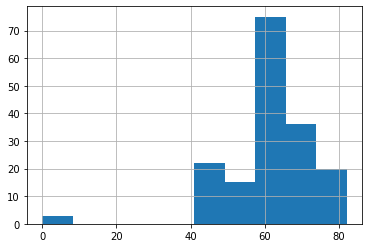

In [52]:
df['popularity'].hist()

Прописываем условие для новой переменной.

In [53]:
df['most_popular'] = df['popularity'].apply(lambda x:1 if x >=63 else 0)

In [54]:
df.iloc[70:80]

№                           name          album release_date  length  \
70  70                  I Know Places  1989 (Deluxe)   2014-01-01  195706   
71  71                          Clean  1989 (Deluxe)   2014-01-01  271000   
72  72                     Wonderland  1989 (Deluxe)   2014-01-01  245560   
73  73                You Are In Love  1989 (Deluxe)   2014-01-01  267106   
74  74                  New Romantics  1989 (Deluxe)   2014-01-01  230466   
75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   
78  78               ...Ready For It?     Reputation   2017-11-10  208186   
79  79                       End Game     Reputation   2017-11-10  244826   

    popularity  danceability  acousticness  energy  instrumentalness  \
70          58         0.602       0.24500   0.755          0.000000   
71          63         0.815       0.23200   0.377          0.000000   
72          65         0.422       0.04930   0.692          0.000026   
73          62         0.474       0.70700   0.480          0.000108   
74          66         0.633       0.00463   0.889          0.000458   
75           0         0.592       0.82900   0.128          0.000000   
76           0         0.781       0.71700   0.357          0.000000   
77           0         0.675       0.80100   0.234          0.000000   
78          74         0.613       0.05270   0.764          0.000000   
79          72         0.649       0.00845   0.589          0.000000   

    liveness  loudness  speechiness  valence    tempo  long_song  \
70    0.1780    -4.991       0.0710    0.495  159.965          0   
71    0.1000    -7.754       0.0346    0.211  103.970          1   
72    0.1770    -5.447       0.0549    0.197  184.014          1   
73    0.0903    -8.894       0.0622    0.319  170.109          1   
74    0.0658    -5.870       0.0715    0.584  121.956          0   
75    0.5270   -17.932       0.5890    0.150   78.828          0   
76    0.1850   -16.394       0.9120    0.645  118.317          0   
77    0.6570   -15.064       0.7210    0.578  127.296          0   
78    0.1970    -6.509       0.1360    0.417  160.015          0   
79    0.1080    -6.237       0.0558    0.151  159.073          1   

         danceability_cat  most_popular  
70  умеренно-танцевальная             0  
71  наиболее танцевальная             1  
72  умеренно-танцевальная             1  
73  умеренно-танцевальная             0  
74  умеренно-танцевальная             1  
75  умеренно-танцевальная             0  
76  наиболее танцевальная             0  
77  наиболее танцевальная             0  
78  умеренно-танцевальная             1  
79  умеренно-танцевальная             1

Мы посмотрели несколько рандомных песен из датасета и проверили, что все работает.

**Теперь мы хотим выбрать выбрать песни Тейлор Свифт, которые лучше всего подойдут для танцевальной вечеринки.** Предположим, что эти песни должны удовлетворять 3-м условиям: быть достаточно популярными, не слишком длинными и наиболее танцевальными.

In [55]:
np.where((df['most_popular'] == 1) & (df['long_song'] == 0) &
          (df['danceability_cat'] == 'наиболее танцевальная'),1,0) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Запишем это как новую переменную **party**.

In [56]:
df['party'] = np.where((df['most_popular'] == 1) & (df['long_song'] == 0) &
          (df['danceability_cat'] == 'наиболее танцевальная'),1,0) 

In [57]:
df.iloc[80:85]

№                      name       album release_date  length  popularity  \
80  80       I Did Something Bad  Reputation   2017-11-10  238253          74   
81  81            Don’t Blame Me  Reputation   2017-11-10  236413          75   
82  82                  Delicate  Reputation   2017-11-10  232253          78   
83  83  Look What You Made Me Do  Reputation   2017-11-10  211853          77   
84  84             So It Goes...  Reputation   2017-11-10  227906          66   

    danceability  acousticness  energy  instrumentalness  liveness  loudness  \
80         0.696        0.0679   0.602          0.000021    0.0696    -6.156   
81         0.615        0.1060   0.534          0.000018    0.0607    -6.719   
82         0.750        0.2160   0.404          0.000357    0.0911   -10.178   
83         0.766        0.2040   0.709          0.000014    0.1260    -6.471   
84         0.574        0.1220   0.610          0.000001    0.1300    -7.283   

    speechiness  valence    tempo  long_song       danceability_cat  \
80       0.1590   0.3050   82.989          0  наиболее танцевальная   
81       0.0386   0.1930  135.917          0  умеренно-танцевальная   
82       0.0682   0.0499   95.045          0  наиболее танцевальная   
83       0.1230   0.5060  128.070          0  наиболее танцевальная   
84       0.0732   0.3740   74.957          0  умеренно-танцевальная   

    most_popular  party  
80             1      1  
81             1      0  
82             1      1  
83             1      1  
84             1      0

Посмотрим, сколько песен подойдет для вечеринки.

In [58]:
df['party'].sum()

22

Посмотрим, что это за 22 песни.

In [59]:
df[df['party'] == 1]

№                                    name                      album  \
42    42                                      22       Red (Deluxe Edition)   
60    60                             Blank Space              1989 (Deluxe)   
80    80                     I Did Something Bad                 Reputation   
82    82                                Delicate                 Reputation   
83    83                Look What You Made Me Do                 Reputation   
85    85                                Gorgeous                 Reputation   
87    87                        King Of My Heart                 Reputation   
89    89                                   Dress                 Reputation   
92    92                          New Year’s Day                 Reputation   
93    93               I Forgot That You Existed                      Lover   
96    96                                 The Man                      Lover   
98    98                        I Think He Knows                      Lover   
99    99  Miss Americana & The Heartbreak Prince                      Lover   
100  100                             Paper Rings                      Lover   
102  102                Death By A Thousand Cuts                      Lover   
103  103                              London Boy                      Lover   
105  105                               False God                      Lover   
106  106                   You Need To Calm Down                      Lover   
107  107                               Afterglow                      Lover   
109  109              It’s Nice To Have A Friend                      Lover   
111  111                                   the 1  Folklore (Deluxe Version)   
113  113         the last great american dynasty  Folklore (Deluxe Version)   

    release_date  length  popularity  danceability  acousticness  energy  \
42    2012-10-22  232120          64         0.661       0.00215   0.729   
60    2014-01-01  231826          82         0.760       0.10300   0.703   
80    2017-11-10  238253          74         0.696       0.06790   0.602   
82    2017-11-10  232253          78         0.750       0.21600   0.404   
83    2017-11-10  211853          77         0.766       0.20400   0.709   
85    2017-11-10  209680          72         0.800       0.07130   0.535   
87    2017-11-10  214320          69         0.675       0.00882   0.703   
89    2017-11-10  230373          71         0.719       0.03290   0.469   
92    2017-11-10  235466          67         0.661       0.92100   0.151   
93    2019-08-23  170640          72         0.664       0.29800   0.316   
96    2019-08-23  190360          75         0.777       0.07670   0.658   
98    2019-08-23  173386          70         0.897       0.00889   0.366   
99    2019-08-23  234146          70         0.662       0.02800   0.747   
100   2019-08-23  222400          76         0.811       0.01290   0.719   
102   2019-08-23  198533          71         0.712       0.45400   0.732   
103   2019-08-23  190240          72         0.695       0.02460   0.710   
105   2019-08-23  200306          68         0.739       0.73600   0.320   
106   2019-08-23  171360          78         0.771       0.00929   0.671   
107   2019-08-23  223293          74         0.756       0.13000   0.449   
109   2019-08-23  150440          65         0.737       0.97100   0.175   
111   2020-08-18  210240          64         0.780       0.75000   0.361   
113   2020-08-18  231000          63         0.688       0.48100   0.653   

     instrumentalness  liveness  loudness  speechiness  valence    tempo  \
42           0.001300    0.0477    -6.561       0.0376   0.6680  103.987   
60           0.000000    0.0913    -5.412       0.0540   0.5700   95.997   
80           0.000021    0.0696    -6.156       0.1590   0.3050   82.989   
82           0.000357    0.0911   -10.178       0.0682   0.0499   95.045   
83           0.000014    0.1260    -6.471       0.1230   0.5

## <font color = green> 3. Группировка и базовая визуализация данных </font>

### <font color = green> 3.1. Группировка данных </font>

Вернемся к переменным **danceability_cat**, **long_song**, **most_popular** и еще раз посмотрим, сколько значений попадает в каждую из категорий по этим трем переменным.

In [60]:
df['danceability_cat'].value_counts()

умеренно-танцевальная    115
наиболее танцевальная     45
наименее танцевальная     11
Name: danceability_cat, dtype: int64

In [61]:
df['long_song'].value_counts()

0    104
1     67
Name: long_song, dtype: int64

In [62]:
df['most_popular'].value_counts()

1    90
0    81
Name: most_popular, dtype: int64

In [63]:
# сортировка по числу значений
df['album'].value_counts()

Fearless (Taylor's Version)    26
Speak Now (Deluxe Package)     22
Red (Deluxe Edition)           22
1989 (Deluxe)                  19
Lover                          18
Folklore (Deluxe Version)      17
Evermore (Deluxe Version)      17
Taylor Swift                   15
Reputation                     15
Name: album, dtype: int64

In [64]:
# сортировка по индексу
df.groupby('album').size()

album
1989 (Deluxe)                  19
Evermore (Deluxe Version)      17
Fearless (Taylor's Version)    26
Folklore (Deluxe Version)      17
Lover                          18
Red (Deluxe Edition)           22
Reputation                     15
Speak Now (Deluxe Package)     22
Taylor Swift                   15
dtype: int64

Посмотрим, в каких альбомах находятся самые популярные песни.

In [65]:
df.groupby('album')['most_popular'].value_counts().to_frame()

most_popular
album                       most_popular              
1989 (Deluxe)               0                       12
                            1                        7
Evermore (Deluxe Version)   1                       16
                            0                        1
Fearless (Taylor's Version) 1                       19
                            0                        7
Folklore (Deluxe Version)   1                        9
                            0                        8
Lover                       1                       18
Red (Deluxe Edition)        0                       17
                            1                        5
Reputation                  1                       15
Speak Now (Deluxe Package)  0                       21
                            1                        1
Taylor Swift                0                       15

Как мы видим, наибольшее число самых популярных песен находится в следующих альбомах: Evermore (Deluxe Version) *(16)*, Fearless (Taylor's Version) *(19)*, Lover *(18)* и Reputation *(15)*. \
*Это может быть связано с тем, что все эти альбомы вышли после 2014 года, в котором Тейлор удалила свою музыку с платформы Spotify. Позже она вернула свои записи на платформу, но прослушивания у более старых альбомов уже были потеряны и набирались заново, в то время как новые альбомы набирали прослушивания, начиная с даты релиза.* 

Посмотрим, как наиболее популярные песни располагаются по альбомам в зависимости от категории танцевальности.

In [66]:
df.groupby(['album', 'danceability_cat'])['most_popular'].sum()

album                        danceability_cat     
1989 (Deluxe)                наиболее танцевальная     2
                             наименее танцевальная     0
                             умеренно-танцевальная     5
Evermore (Deluxe Version)    наиболее танцевальная     0
                             наименее танцевальная     3
                             умеренно-танцевальная    13
Fearless (Taylor's Version)  наиболее танцевальная     2
                             наименее танцевальная     0
                             умеренно-танцевальная    17
Folklore (Deluxe Version)    наиболее танцевальная     2
                             наименее танцевальная     3
                             умеренно-танцевальная     4
Lover                        наиболее танцевальная    12
                             наименее танцевальная     2
                             умеренно-танцевальная     4
Red (Deluxe Edition)         наиболее танцевальная     1
                             наименее

Мы видим, что, например, в альбоме Evermore (Deluxe Version) 13 одновременно популярных и умеренно-танцевальных песен, а также 3 одновременно популярные и наименее танцевальные песни *(проще говоря, из 16 популярных песен в этом альбоме, 13 - умеренно-танцевальные, а 3 - наименее танцевальные)*. Одновременно популярных и наиболее танцевальных песен в данном альбоме нет.

### <font color = green> 3.2. Базовая визуализация данных </font>

На первый взгляд, танцевальность песни не оказывает прямого влияния на ее популярность.

Построим гистограммы для переменной **popularity**.

<AxesSubplot:>

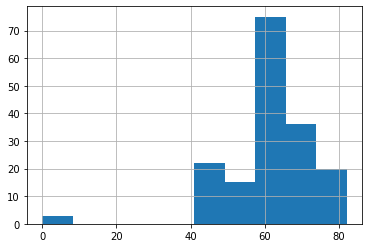

In [67]:
df['popularity'].hist()

<AxesSubplot:>

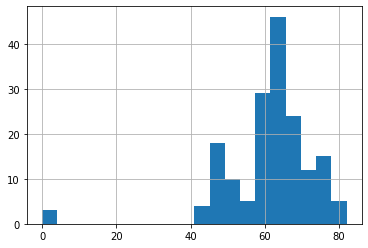

In [68]:
df['popularity'].hist(bins = 20)

Как мы можем видеть, у нас есть некоторое маленькое количество значений, расположенных у 0. Вероятно, это выбросы, но к выявлению выбросов мы приступим позже.

Сделаем графики для переменных **danceability** и **danceability_cat** (количественная и категориальная переменная для признака танцевальности песни).

<AxesSubplot:>

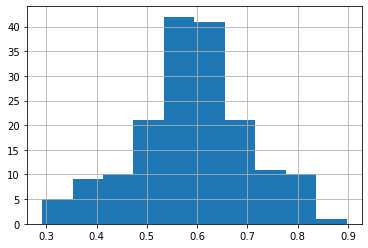

In [69]:
df['danceability'].hist()

<AxesSubplot:>

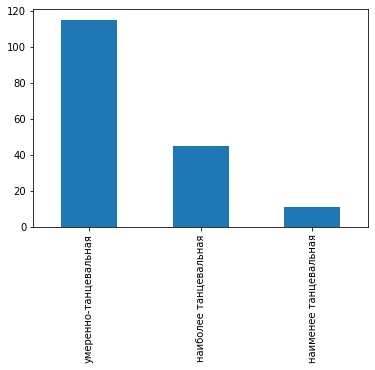

In [70]:
df['danceability_cat'].value_counts().plot(kind = 'bar')

# сортировка категорий по количеству значений

<AxesSubplot:xlabel='danceability_cat'>

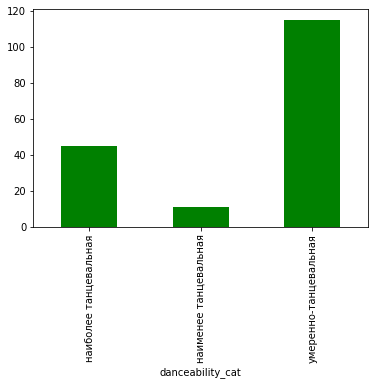

In [71]:
df.groupby('danceability_cat').size().plot(kind = 'bar', color = 'g')

# сортировка категорий по алфавиту

Посмотрим, как разные по степени танцевальности песни распределяются по альбомам.

In [72]:
df.groupby('album')['danceability_cat'].value_counts().unstack()

наиболее танцевальная  наименее танцевальная  \
album                                                                       
1989 (Deluxe)                                    7                      0   
Evermore (Deluxe Version)                        1                      3   
Fearless (Taylor's Version)                      2                      1   
Folklore (Deluxe Version)                        4                      4   
Lover                                           12                      2   
Red (Deluxe Edition)                             7                      0   
Reputation                                       7                      0   
Speak Now (Deluxe Package)                       3                      1   
Taylor Swift                                     2                      0   

                             умеренно-танцевальная  
album                                               
1989 (Deluxe)                                   12  
Evermore (Deluxe Version)                       13  
Fearless (Taylor's Version)                     23  
Folklore (Deluxe Version)                        9  
Lover                                            4  
Red (Deluxe Edition)                            15  
Reputation                                       8  
Speak Now (Deluxe Package)                      18  
Taylor Swift                                    13

<AxesSubplot:xlabel='album'>

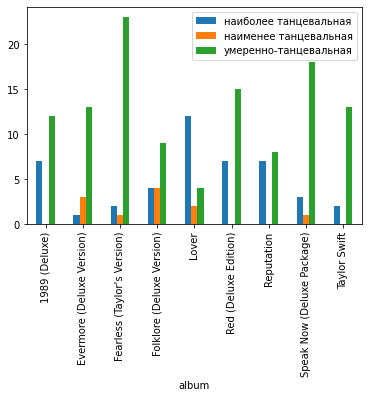

In [73]:
df.groupby('album')['danceability_cat'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='album'>

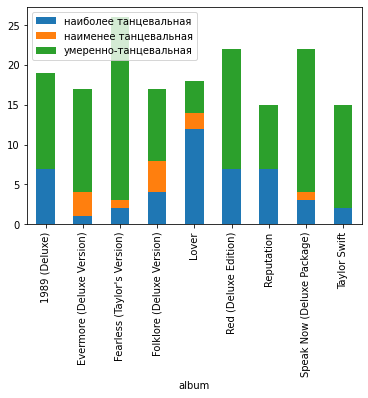

In [74]:
df.groupby('album')['danceability_cat'].value_counts().unstack().plot(kind='bar', stacked = True)

Мы видим, что в альбомах 1989, Red, Reputation и Taylor Swift присутствуют только *наиболее танцевальные* и *умеренно-танцевальные* песни. В остальных альбомах присутствуют песни всех трех категорий.

## <font color = green> 4. Меры центральной тенденции и разброса </font>

### <font color = green> 4.1. Меры центральной тенденции </font>

Создадим переменную **length_sec**, которая будет обозначать длительность песен в секундах (а не миллисекундах), и для удобства округлим полученные  значения. Также поменяем тип переменной на int64 (целочисленные значения).

In [75]:
df['length_sec'] = round(df['length'] / 1000)

In [76]:
df['length_sec']

0      232.0
1      173.0
2      203.0
3      199.0
4      239.0
       ...  
166    278.0
167    244.0
168    189.0
169    209.0
170    242.0
Name: length_sec, Length: 171, dtype: float64

In [77]:
df['length_sec'] = pd.Index(df['length_sec'], dtype = 'int64')

# код взят с сайта https://pandas.pydata.org/docs/reference/api/pandas.Index.html

In [78]:
df['length_sec']

0      232
1      173
2      203
3      199
4      239
      ... 
166    278
167    244
168    189
169    209
170    242
Name: length_sec, Length: 171, dtype: int64

Найдем **среднюю длину песен Тейлор Свифт (в секундах)** двумя способами.

In [79]:
# напрямую
df['length_sec'].sum() / len(df['length'])

236.64327485380116

In [80]:
# с помощью функции mean
df['length_sec'].mean()

236.64327485380116

Как можно заметить, значения идентичны.

Посмотрим **дескриптивные статистики** для некоторых количественных переменных.

In [81]:
df[['length_sec', 'popularity', 'danceability', 'valence', 'tempo']].describe()

length_sec  popularity  danceability     valence       tempo
count  171.000000  171.000000    171.000000  171.000000  171.000000
mean   236.643275   61.228070      0.588632    0.422984  124.141415
std     40.466925   11.904548      0.115067    0.192617   31.484487
min    107.000000    0.000000      0.292000    0.049900   68.534000
25%    212.000000   58.000000      0.527000    0.277500   96.052000
50%    234.000000   63.000000      0.593000    0.416000  121.956000
75%    254.500000   67.000000      0.655500    0.545000  146.040500
max    404.000000   82.000000      0.897000    0.942000  207.476000

In [82]:
df['popularity'].describe()

count    171.000000
mean      61.228070
std       11.904548
min        0.000000
25%       58.000000
50%       63.000000
75%       67.000000
max       82.000000
Name: popularity, dtype: float64

Посмотрим, чему равняется средний процент популярности песен по каждому альбому.

In [83]:
df.groupby('album')['popularity'].mean()

album
1989 (Deluxe)                  54.421053
Evermore (Deluxe Version)      65.470588
Fearless (Taylor's Version)    65.576923
Folklore (Deluxe Version)      62.647059
Lover                          72.111111
Red (Deluxe Edition)           60.500000
Reputation                     71.866667
Speak Now (Deluxe Package)     49.727273
Taylor Swift                   50.133333
Name: popularity, dtype: float64

<AxesSubplot:xlabel='album'>

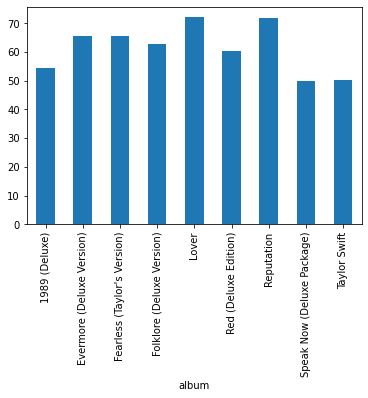

In [84]:
df.groupby('album')['popularity'].mean().plot(kind='bar')

Как мы видим, наиболее высокий средний процент популярности песен наблюдается в альбомах Lover и Reputation.

Посмотрим различия в **среднем проценте популярности песен** по степени их танцевальности и альбомам.

In [85]:
df.groupby(['album', 'danceability_cat'])['popularity'].mean()

album                        danceability_cat     
1989 (Deluxe)                наиболее танцевальная    46.142857
                             наименее танцевальная          NaN
                             умеренно-танцевальная    59.250000
Evermore (Deluxe Version)    наиболее танцевальная    62.000000
                             наименее танцевальная    65.666667
                             умеренно-танцевальная    65.692308
Fearless (Taylor's Version)  наиболее танцевальная    70.000000
                             наименее танцевальная    62.000000
                             умеренно-танцевальная    65.347826
Folklore (Deluxe Version)    наиболее танцевальная    62.250000
                             наименее танцевальная    63.500000
                             умеренно-танцевальная    62.444444
Lover                        наиболее танцевальная    71.833333
                             наименее танцевальная    74.500000
                             умеренно-танцевальная   

Здесь мы видим, что, например, в альбоме 1989 средний процент популярности умеренно-танцевальных песен выше, чем средний процент популярности наиболее танцевальных песен.

Посмотрим на **среднюю длину песен (в секундах)** в зависимости от альбома и степени танцевальности песни.

In [86]:
df.groupby(['album', 'danceability_cat'])['length_sec'].mean()

album                        danceability_cat     
1989 (Deluxe)                наиболее танцевальная    201.285714
                             наименее танцевальная           NaN
                             умеренно-танцевальная    226.333333
Evermore (Deluxe Version)    наиболее танцевальная    181.000000
                             наименее танцевальная    254.666667
                             умеренно-танцевальная    246.153846
Fearless (Taylor's Version)  наиболее танцевальная    266.000000
                             наименее танцевальная    312.000000
                             умеренно-танцевальная    241.217391
Folklore (Deluxe Version)    наиболее танцевальная    228.500000
                             наименее танцевальная    262.500000
                             умеренно-танцевальная    229.555556
Lover                        наиболее танцевальная    200.833333
                             наименее танцевальная    216.000000
                             умеренно-т

Можно заметить, что в большинстве альбомов длительность наиболее танцевальных песнен меньше остальных типов песен (за исключением альбомов Fearless и Reputation).

Аналогичная ситуация наблюдается и с **медианными значениями** длительности песен:

In [87]:
df.groupby(['album', 'danceability_cat'])['length_sec'].median()

album                        danceability_cat     
1989 (Deluxe)                наиболее танцевальная    213.0
                             наименее танцевальная      NaN
                             умеренно-танцевальная    225.0
Evermore (Deluxe Version)    наиболее танцевальная    181.0
                             наименее танцевальная    245.0
                             умеренно-танцевальная    245.0
Fearless (Taylor's Version)  наиболее танцевальная    266.0
                             наименее танцевальная    312.0
                             умеренно-танцевальная    242.0
Folklore (Deluxe Version)    наиболее танцевальная    225.5
                             наименее танцевальная    274.0
                             умеренно-танцевальная    234.0
Lover                        наиболее танцевальная    194.5
                             наименее танцевальная    216.0
                             умеренно-танцевальная    197.5
Red (Deluxe Edition)         наиболее танцевальна

Посмотрим модальное значение переменной **danceability_cat** (категория танцевальности песни) по каждому альбому.

In [88]:
df.groupby('album')['danceability_cat'].agg(lambda x: x.value_counts().index[0])

album
1989 (Deluxe)                  умеренно-танцевальная
Evermore (Deluxe Version)      умеренно-танцевальная
Fearless (Taylor's Version)    умеренно-танцевальная
Folklore (Deluxe Version)      умеренно-танцевальная
Lover                          наиболее танцевальная
Red (Deluxe Edition)           умеренно-танцевальная
Reputation                     умеренно-танцевальная
Speak Now (Deluxe Package)     умеренно-танцевальная
Taylor Swift                   умеренно-танцевальная
Name: danceability_cat, dtype: object

Так, мы видим, что в большинстве альбомов модальная "танцевальность" песен - умеренная (т.е. модальное значение - умеренно-танцевальная). Исключением является альбом Lover, в нем модальным значением является "наиболее танцевальная", т.е. чаще всего встречаются наиболее танцевальные песни.

Также мы можем с помощью функции **agg()** вывести средние и медианные значения длительности песен в зависимости от альбома.

In [89]:
df.groupby('album')['length_sec'].agg(['mean', 'median'])

mean  median
album                                          
1989 (Deluxe)                217.105263   220.0
Evermore (Deluxe Version)    243.823529   245.0
Fearless (Taylor's Version)  245.846154   242.0
Folklore (Deluxe Version)    237.058824   234.0
Lover                        206.000000   199.5
Red (Deluxe Edition)         247.318182   239.5
Reputation                   223.000000   228.0
Speak Now (Deluxe Package)   276.000000   266.0
Taylor Swift                 213.866667   213.0

Построим **пивотальную таблицу** и посмотрим средние и медианные значения "позитивности", популярности и танцевальности песен по альбомам.

In [90]:
df.pivot_table(index = 'album', values = ['valence', 'popularity', 'danceability'],
                     aggfunc = ['mean', 'median'])

mean                            median  \
                            danceability popularity   valence danceability   
album                                                                        
1989 (Deluxe)                   0.633211  54.421053  0.454211       0.6330   
Evermore (Deluxe Version)       0.526824  65.470588  0.433529       0.5460   
Fearless (Taylor's Version)     0.551038  65.576923  0.421923       0.5660   
Folklore (Deluxe Version)       0.541941  62.647059  0.361353       0.5930   
Lover                           0.658222  72.111111  0.481444       0.7035   
Red (Deluxe Edition)            0.633409  60.500000  0.468145       0.6250   
Reputation                      0.657933  71.866667  0.293400       0.6490   
Speak Now (Deluxe Package)      0.559000  49.727273  0.429682       0.5615   
Taylor Swift                    0.545267  50.133333  0.426533       0.5760   

                                                
                            popularity valence  
album                                           
1989 (Deluxe)                     60.0  0.4950  
Evermore (Deluxe Version)         65.0  0.3540  
Fearless (Taylor's Version)       64.0  0.4225  
Folklore (Deluxe Version)         63.0  0.4040  
Lover                             71.5  0.4700  
Red (Deluxe Edition)              60.5  0.4775  
Reputation                        72.0  0.3050  
Speak Now (Deluxe Package)        48.0  0.3470  
Taylor Swift                      49.0  0.4280

Можем заметить, что d большинстве случаев чем выше показатель **valence** (позитивность, т. е. с ростом показателя песни становятся более радостными и менее грустными), тем больше показатель **танцевальности** песни, что достаточно логично.

Посмотрим взаимосвязь этих переменных **на графике**.

In [91]:
colors = ['#1AD5E8', '#A0E81A', '#331AEB']

<AxesSubplot:title={'center':'graph'}, ylabel='valence'>

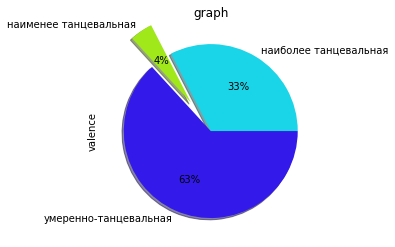

In [92]:
df.groupby('danceability_cat')['valence'].sum().plot(kind = 'pie', colors = colors, explode = [0, 0.4, 0],
                                                     shadow = True, autopct = '%.0f%%', title = 'graph')

Как мы можем видеть, 4%  позитивных песен находятся в категории *наименее танцевальная*, 33% - в категории *наиболее танцевальная* и 63% - в категории *умеренно-танцевальная*. Неудивительно, что в категории наименее танцевальных песен присутствует наименьший процент позитивных песен. 

Построим еще один график. Теперь посмотрим, как по категориям танцевальности распределяется число ударов в минуту (**tempo**) песнях.

In [93]:
import matplotlib.pyplot as plt

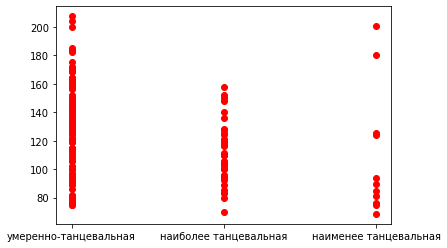

In [94]:
plt.scatter(df['danceability_cat'], df['tempo'], color = 'r')

На данном графике мы видим, что распределение наиболее густое среди *умеренно-танцевальных* и *наиболее танцевальных* песен - это неудивительно, поскольку они обычно наиболее активные и содержат большее число ударов/битов в минуту, чем наименее танцевальные песни.

### <font color = green> 4.2. Меры разброса </font>

 Сформируем переменную, которая будет содержать информацию о длительности каждого альбома Тейлор Свифт.

In [95]:
df.groupby('album')['length_sec'].sum()

album
1989 (Deluxe)                  4125
Evermore (Deluxe Version)      4145
Fearless (Taylor's Version)    6392
Folklore (Deluxe Version)      4030
Lover                          3708
Red (Deluxe Edition)           5441
Reputation                     3345
Speak Now (Deluxe Package)     6072
Taylor Swift                   3208
Name: length_sec, dtype: int64

In [96]:
pd.DataFrame(df.groupby('album')['length_sec'].sum())

length_sec
album                                  
1989 (Deluxe)                      4125
Evermore (Deluxe Version)          4145
Fearless (Taylor's Version)        6392
Folklore (Deluxe Version)          4030
Lover                              3708
Red (Deluxe Edition)               5441
Reputation                         3345
Speak Now (Deluxe Package)         6072
Taylor Swift                       3208

In [97]:
album_length = pd.DataFrame(df.groupby('album')['length_sec'].sum())

<AxesSubplot:xlabel='album'>

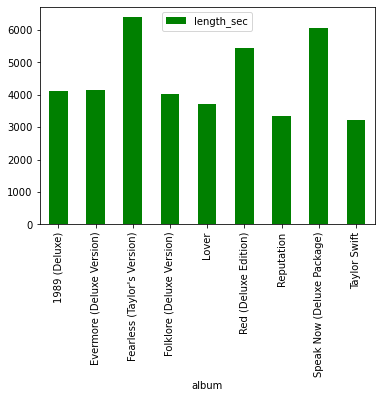

In [98]:
album_length.plot(kind='bar', color = 'g')

Как мы можем видеть, самыми длинными являются альбомы Fearless, Speak Now и Red.

Посчитаем размах переменной **length_sec**.

In [99]:
album_length['length_sec'].max() - album_length['length_sec'].min()

3184

Посчитаем интерквартильный размах переменной **length_sec** несколькими способами.

In [100]:
album_length.describe()

length_sec
count     9.000000
mean   4496.222222
std    1175.494766
min    3208.000000
25%    3708.000000
50%    4125.000000
75%    5441.000000
max    6392.000000

In [101]:
# способ 1
album_length.describe()['length_sec']['75%'] - album_length.describe()['length_sec']['25%']

1733.0

In [102]:
# способ 2
np.percentile(album_length['length_sec'], 75) - np.percentile(album_length['length_sec'], 25)

1733.0

Найдем **дисперсию** и **среднеквадратическое отклонение** длительности альбома в секундах.

In [103]:
length_mean = album_length['length_sec'].mean()
deviations = album_length['length_sec'] - length_mean
sq_deviations = deviations ** 2

# для выборки
variance_samp = sq_deviations.sum() / (len(album_length) - 1)
std_samp = np.sqrt(variance_samp)
print('Дисперсия равна', variance_samp)
print('Среднеквадратическое отклонение равно', std_samp)

Дисперсия равна 1381787.9444444445
Среднеквадратическое отклонение равно 1175.4947658090377


In [104]:
# для генеральной совокупности
variance_pop = sq_deviations.sum() / len(album_length)
std_pop = np.sqrt(variance_pop)
print('Дисперсия равна', variance_pop)
print('Среднеквадратическое отклонение равно', std_pop)

Дисперсия равна 1228255.950617284
Среднеквадратическое отклонение равно 1108.267093537151


Мы посчитали эти показатели не только для выборки, но и для генеральной совокупности, поскольку считаем, что по умолчанию наша выборка недооценивает настоящий разброс.

Найдем дисперсию и среднекв. отклонение с помощью **готовых функций**.

In [105]:
print('Дисперсия (по выборке) =', album_length['length_sec'].var())
print('Среднекв. отклонение (по выборке) =', np.sqrt(album_length['length_sec'].var()))
print('Среднекв. отклонение (по выборке) =', album_length['length_sec'].std())

Дисперсия (по выборке) = 1381787.9444444447
Среднекв. отклонение (по выборке) = 1175.4947658090377
Среднекв. отклонение (по выборке) = 1175.4947658090377


In [106]:
print('Дисперсия (по ген. сов.) =', album_length['length_sec'].var(ddof=0))
print('Среднекв. отклонение (по ген. сов.) =', album_length['length_sec'].std(ddof=0))

Дисперсия (по ген. сов.) = 1228255.9506172843
Среднекв. отклонение (по ген. сов.) = 1108.2670935371511


Составим **пивотальную таблицу** с желаемыми мерами центральной тенденции и разброса.

In [107]:
# создадим функцию расчета размаха
def range_values(x):
    return x.max() - x.min()

df.pivot_table(index='album', 
                  values=['popularity', 'length_sec'],
                  aggfunc=['mean', 'std', 'var', range_values])

mean                   std             \
                             length_sec popularity length_sec popularity   
album                                                                      
1989 (Deluxe)                217.105263  54.421053  40.774304  25.226344   
Evermore (Deluxe Version)    243.823529  65.470588  36.671234   2.452490   
Fearless (Taylor's Version)  245.846154  65.576923  27.287642   4.437775   
Folklore (Deluxe Version)    237.058824  62.647059  32.558545   1.729927   
Lover                        206.000000  72.111111  37.534298   4.391019   
Red (Deluxe Edition)         247.318182  60.500000  38.530614   4.415880   
Reputation                   223.000000  71.866667  13.711309   3.758166   
Speak Now (Deluxe Package)   276.000000  49.727273  49.863624   5.284135   
Taylor Swift                 213.866667  50.133333  22.363448   3.481926   

                                     var             range_values             
                              length_sec  popularity   length_sec popularity  
album                                                                         
1989 (Deluxe)                1662.543860  636.368421          164         82  
Evermore (Deluxe Version)    1344.779412    6.014706          134         10  
Fearless (Taylor's Version)   744.615385   19.693846          123         16  
Folklore (Deluxe Version)    1060.058824    2.992647          104          5  
Lover                        1408.823529   19.281046          143         15  
Red (Deluxe Edition)         1484.608225   19.500000          136         19  
Reputation                    188.000000   14.123810           41         12  
Speak Now (Deluxe Package)   2486.380952   27.922078          187         21  
Taylor Swift                  500.123810   12.123810           75         13

Можно заметить, что **у альбома 1989 самые большие показатели разброса по популярности песен**. Можно предположить, что это связано с тем, сразу 5 песен из данного альбома составляют топ-5 самымых популярных песен в дискографии Тейлор (т.е. среди всех ее альбомов), при этом в данном альбоме также находится 3 композиции с нулевым значением популярности.

2 последующие строки были использованы для аргументации вывода выше.

In [108]:
df.sort_values(by=['album', 'popularity'], ascending=[True, False])

№                                  name          album release_date  \
60  60                           Blank Space  1989 (Deluxe)   2014-01-01   
64  64                          Shake It Off  1989 (Deluxe)   2014-01-01   
61  61                                 Style  1989 (Deluxe)   2014-01-01   
62  62                      Out Of The Woods  1989 (Deluxe)   2014-01-01   
74  74                         New Romantics  1989 (Deluxe)   2014-01-01   
..  ..                                   ...            ...          ...   
12  12                             Invisible   Taylor Swift   2006-10-24   
14  14  Teardrops on My Guitar - Pop Version   Taylor Swift   2006-10-24   
5    5                           The Outside   Taylor Swift   2006-10-24   
6    6            Tied Together with a Smile   Taylor Swift   2006-10-24   
13  13                A Perfectly Good Heart   Taylor Swift   2006-10-24   

    length  popularity  danceability  acousticness  energy  instrumentalness  \
60  231826          82         0.760      0.103000   0.703          0.000000   
64  219200          80         0.647      0.064700   0.800          0.000000   
61  231000          75         0.588      0.002450   0.791          0.002580   
62  235800          67         0.553      0.000743   0.841          0.000012   
74  230466          66         0.633      0.004630   0.889          0.000458   
..     ...         ...           ...           ...     ...               ...   
12  203226          48         0.612      0.637000   0.394          0.000000   
14  179066          48         0.459      0.040200   0.753          0.000000   
5   207106          47         0.589      0.004910   0.805          0.000000   
6   248106          47         0.479      0.525000   0.578          0.000000   
13  220146          46         0.483      0.003490   0.751          0.000000   

    liveness  loudness  speechiness  valence    tempo  long_song  \
60    0.0913    -5.412       0.0540    0.570   95.997          0   
64    0.3340    -5.384       0.1650    0.942  160.078          0   
61    0.1180    -5.595       0.0402    0.487   94.933          0   
62    0.3410    -6.937       0.0396    0.338   92.008          0   
74    0.0658    -5.870       0.0715    0.584  121.956          0   
..       ...       ...          ...      ...      ...        ...   
12    0.1470    -5.723       0.0243    0.233   96.001          0   
14    0.0863    -3.827       0.0537    0.483  199.997          0   
5     0.2400    -4.055       0.0293    0.591  112.982          0   
6     0.0841    -4.963       0.0294    0.192  146.165          1   
13    0.1280    -5.726       0.0365    0.268  156.092          0   

         danceability_cat  most_popular  party  length_sec  
60  наиболее танцевальная             1      1         232  
64  умеренно-танцевальная             1      0         219  
61  умеренно-танцевальная             1      0         231  
62  умеренно-танцевальная             1      0         236  
74  умеренно-танцевальная             1      0         230  
..                    ...           ...    ...         ...  
12  умеренно-танцевальная             0      0         203  
14  умеренно-танцевальная             0      0         179  
5   умеренно-танцевальная             0      0         207  
6   умеренно-танцевальная             0      0         248  
13  умеренно-танцевальная             0      0         220  

[171 rows x 20 columns]

In [109]:
df[df['album'] == "1989 (Deluxe)"].sort_values(by = ['popularity'], ascending = False)

№                           name          album release_date  length  \
60  60                    Blank Space  1989 (Deluxe)   2014-01-01  231826   
64  64                   Shake It Off  1989 (Deluxe)   2014-01-01  219200   
61  61                          Style  1989 (Deluxe)   2014-01-01  231000   
62  62               Out Of The Woods  1989 (Deluxe)   2014-01-01  235800   
74  74                  New Romantics  1989 (Deluxe)   2014-01-01  230466   
72  72                     Wonderland  1989 (Deluxe)   2014-01-01  245560   
71  71                          Clean  1989 (Deluxe)   2014-01-01  271000   
73  73                You Are In Love  1989 (Deluxe)   2014-01-01  267106   
67  67                 Wildest Dreams  1989 (Deluxe)   2014-01-01  220440   
68  68           How You Get The Girl  1989 (Deluxe)   2014-01-01  247533   
65  65               I Wish You Would  1989 (Deluxe)   2014-01-01  207440   
69  69                      This Love  1989 (Deluxe)   2014-01-01  250093   
66  66                      Bad Blood  1989 (Deluxe)   2014-01-01  211933   
59  59            Welcome To New York  1989 (Deluxe)   2014-01-01  212600   
70  70                  I Know Places  1989 (Deluxe)   2014-01-01  195706   
63  63     All You Had To Do Was Stay  1989 (Deluxe)   2014-01-01  193293   
75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   

    popularity  danceability  acousticness  energy  instrumentalness  \
60          82         0.760      0.103000   0.703          0.000000   
64          80         0.647      0.064700   0.800          0.000000   
61          75         0.588      0.002450   0.791          0.002580   
62          67         0.553      0.000743   0.841          0.000012   
74          66         0.633      0.004630   0.889          0.000458   
72          65         0.422      0.049300   0.692          0.000026   
71          63         0.815      0.232000   0.377          0.000000   
73          62         0.474      0.707000   0.480          0.000108   
67          61         0.550      0.069200   0.688          0.001440   
68          60         0.765      0.003640   0.656          0.008680   
65          60         0.653      0.015800   0.893          0.000049   
69          60         0.481      0.678000   0.435          0.000000   
66          59         0.646      0.088500   0.794          0.000006   
59          58         0.789      0.034800   0.634          0.000002   
70          58         0.602      0.245000   0.755          0.000000   
63          58         0.605      0.002010   0.725          0.000020   
75           0         0.592      0.829000   0.128          0.000000   
76           0         0.781      0.717000   0.357          0.000000   
77           0         0.675      0.801000   0.234          0.000000   

    liveness  loudness  speechiness  valence    tempo  long_song  \
60    0.0913    -5.412       0.0540    0.570   95.997          0   
64    0.3340    -5.384       0.1650    0.942  160.078          0   
61    0.1180    -5.595       0.0402    0.487   94.933          0   
62    0.3410    -6.937       0.0396    0.338   92.008          0   
74    0.0658    -5.870       0.0715    0.584  121.956          0   
72    0.1770    -5.447       0.0549    0.197  184.014          1   
71    0.1000    -7.754       0.0346    0.211  103.970          1   
73    0.0903    -8.894       0.0622    0.319  170.109          1   
67    0.1060    -7.416       0.0897    0.465  139.997          0   
68    0.0918    -6.112       0.0504    0.545  119.997          1   
65    0.1020    -5.966       0.0538    0.513  118.035          0   
69    0.0928    -8.795       0.0321    0.107  143.950          1   
66    0.2010    -6.104       0.1900    0.287  170.216          0   
59    0.3020    -4.762       0.0323    0.658  116.992          0   
70 

## <font color = green> 5. Z-оценка и выбросы (+ доверительный интервал) </font>

### <font color = green> 5.1. Z-оценка </font>

In [110]:
import scipy.stats

Будем считать Z-оценку для показателя популярности песни.

<AxesSubplot:>

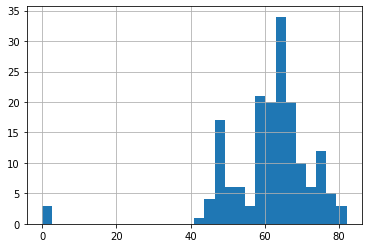

In [111]:
df['popularity'].hist(bins = 30)

Посчитаем Z-оценку для первой песни в списке вручную.

In [112]:
x = df['popularity'][0] # значение популярности для первой песни в списке
mean = df['popularity'].mean()
sigma = df['popularity'].std(ddof=0)
print(x, mean, sigma)
z_score = (x - mean) / sigma
print('Z-оценка =', z_score)

49 61.228070175438596 11.869688473709479
Z-оценка = -1.030193016651019


Посчитаем Z-оценку для всех песен с помощью специальной функции.

In [113]:
scipy.stats.zscore(df['popularity'])

0     -1.030193
1     -0.608952
2     -0.187711
3     -1.030193
4     -0.945945
         ...   
166    1.076012
167    0.317778
168    0.486275
169    0.402027
170    0.233530
Name: popularity, Length: 171, dtype: float64

In [114]:
df['z_score'] = scipy.stats.zscore(df['popularity'])

In [115]:
df.head()

№                                         name         album release_date  \
0  0                                   Tim McGraw  Taylor Swift   2006-10-24   
1  1                              Picture To Burn  Taylor Swift   2006-10-24   
2  2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   2006-10-24   
3  3                        A Place in this World  Taylor Swift   2006-10-24   
4  4                                  Cold As You  Taylor Swift   2006-10-24   

   length  popularity  danceability  acousticness  energy  instrumentalness  \
0  232106          49         0.580         0.575   0.491               0.0   
1  173066          54         0.658         0.173   0.877               0.0   
2  203040          59         0.621         0.288   0.417               0.0   
3  199200          49         0.576         0.051   0.777               0.0   
4  239013          50         0.418         0.217   0.482               0.0   

   ...  loudness  speechiness  valence    tempo  long_song  \
0  ...    -6.462       0.0251    0.425   76.009          0   
1  ...    -2.098       0.0323    0.821  105.586          0   
2  ...    -6.941       0.0231    0.289   99.953          0   
3  ...    -2.881       0.0324    0.428  115.028          0   
4  ...    -5.769       0.0266    0.261  175.558          0   

        danceability_cat most_popular  party  length_sec   z_score  
0  умеренно-танцевальная            0      0         232 -1.030193  
1  наиболее танцевальная            0      0         173 -0.608952  
2  умеренно-танцевальная            0      0         203 -0.187711  
3  умеренно-танцевальная            0      0         199 -1.030193  
4  умеренно-танцевальная            0      0         239 -0.945945  

[5 rows x 21 columns]

In [116]:
df['popularity'].describe()

count    171.000000
mean      61.228070
std       11.904548
min        0.000000
25%       58.000000
50%       63.000000
75%       67.000000
max       82.000000
Name: popularity, dtype: float64

Как мы можем видеть, среднее значение популярности составляет 61.23, при этом у первых 5 песен в списке значение популярности меньше, на что и указывает Z-оценка.

<AxesSubplot:>

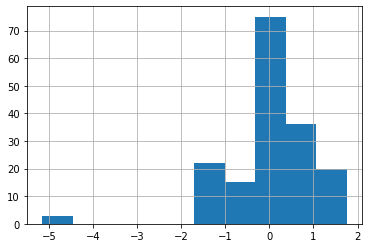

In [117]:
df['z_score'].hist()

Посмотрим, есть ли песни, популярность которых на 3 стандартных отклонения меньше среднего значения популярности.

In [118]:
df[df['z_score'] < -3] 

№                           name          album release_date  length  \
75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   

    popularity  danceability  acousticness  energy  instrumentalness  ...  \
75           0         0.592         0.829   0.128               0.0  ...   
76           0         0.781         0.717   0.357               0.0  ...   
77           0         0.675         0.801   0.234               0.0  ...   

    loudness  speechiness  valence    tempo  long_song       danceability_cat  \
75   -17.932        0.589    0.150   78.828          0  умеренно-танцевальная   
76   -16.394        0.912    0.645  118.317          0  наиболее танцевальная   
77   -15.064        0.721    0.578  127.296          0  наиболее танцевальная   

   most_popular  party  length_sec   z_score  
75            0      0         216 -5.158355  
76            0      0         107 -5.158355  
77            0      0         131 -5.158355  

[3 rows x 21 columns]

Да, это как раз песни с нулевой популярностью. 3 стандартных отклонения - один из способов определения выбросов. Так, мы можем предположить, что 3 данные песни - это наши выбросы.

А больше на 3 стандартных отклонения?

In [119]:
df[df['z_score'] > 3] 

Empty DataFrame
Columns: [№, name, album, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, valence, tempo, long_song, danceability_cat, most_popular, party, length_sec, z_score]
Index: []

[0 rows x 21 columns]

Таких песен нет.

Предположим, что популярность наиболее танцевальных песен выше среднего значения популярности. 

In [120]:
df.groupby('danceability_cat')['z_score'].mean()

danceability_cat
наиболее танцевальная    0.076267
наименее танцевальная    0.271825
умеренно-танцевальная   -0.055844
Name: z_score, dtype: float64

Мы оказались правы. Можно отметить, что популярность *наиболее танцевальных* и *наименее танцевальных* песен среднего значения популярности. При этом популярность *умеренно-танцевальных* песен в основном чуть ниже среднего значения.

### <font color = green> 5.2. Выбросы </font>

In [121]:
df['popularity'].describe()

count    171.000000
mean      61.228070
std       11.904548
min        0.000000
25%       58.000000
50%       63.000000
75%       67.000000
max       82.000000
Name: popularity, dtype: float64

Мы видим, что минимальное значение - это 0, оно соответствует нулевому значению популярности у 3-х песен, которые мы выявили чуть выше (при расчете z-оценки).

Сначала **попробуем выявить выбросы с помощью интерквартильного размаха**. Выбросами будут считаться те значения, которые выше первого квартиля на 1.5 интерквартильных размаха или ниже третьего квартиля так же на 1.5 интерквартильных размаха.

In [122]:
q1 = df['popularity'].quantile(0.25)
q3 = df['popularity'].quantile(0.75)
iqr = q3 - q1

In [123]:
iqr_lower_level = q1 - 1.5 * iqr
iqr_upper_level = q3 + 1.5 * iqr
print(iqr_lower_level, iqr_upper_level)

44.5 80.5


In [124]:
df[df['popularity'] > iqr_upper_level]

№         name          album release_date  length  popularity  \
60  60  Blank Space  1989 (Deluxe)   2014-01-01  231826          82   

    danceability  acousticness  energy  instrumentalness  ...  loudness  \
60          0.76         0.103   0.703               0.0  ...    -5.412   

    speechiness  valence   tempo  long_song       danceability_cat  \
60        0.054     0.57  95.997          0  наиболее танцевальная   

   most_popular  party  length_sec   z_score  
60            1      1         232  1.749998  

[1 rows x 21 columns]

Так, мы наблюдаем один выброс по верхнему значению. Это неудивительно, поскольку песня Blank Space побила множество мызкальных рекордов и считается одним из наиболее успешных хитов в карьере Тейлор.

In [125]:
df[df['popularity'] < iqr_lower_level]

№                           name                       album  \
22  22                  Never Grow Up  Speak Now (Deluxe Package)   
25  25                       Innocent  Speak Now (Deluxe Package)   
35  35               Back To December  Speak Now (Deluxe Package)   
75  75     I Know Places - Voice Memo               1989 (Deluxe)   
76  76  I Wish You Would - Voice Memo               1989 (Deluxe)   
77  77       Blank Space - Voice Memo               1989 (Deluxe)   

   release_date  length  popularity  danceability  acousticness  energy  \
22   2010-01-01  290480          44         0.715         0.829   0.308   
25   2010-01-01  302266          44         0.553         0.202   0.604   
35   2010-01-01  293040          43         0.525         0.113   0.676   
75   2014-01-01  216333           0         0.592         0.829   0.128   
76   2014-01-01  107133           0         0.781         0.717   0.357   
77   2014-01-01  131186           0         0.675         0.801   0.234   

    instrumentalness  ...  loudness  speechiness  valence    tempo  long_song  \
22               0.0  ...    -8.829       0.0305    0.547  124.899          1   
25               0.0  ...    -5.295       0.0258    0.186  133.989          1   
35               0.0  ...    -4.684       0.0294    0.281  141.950          1   
75               0.0  ...   -17.932       0.5890    0.150   78.828          0   
76               0.0  ...   -16.394       0.9120    0.645  118.317          0   
77               0.0  ...   -15.064       0.7210    0.578  127.296          0   

         danceability_cat most_popular  party  length_sec   z_score  
22  наиболее танцевальная            0      0         290 -1.451434  
25  умеренно-танцевальная            0      0         302 -1.451434  
35  умеренно-танцевальная            0      0         293 -1.535682  
75  умеренно-танцевальная            0      0         216 -5.158355  
76  наиболее танцевальная            0      0         107 -5.158355  
77  наиболее танцевальная            0      0         131 -5.158355  

[6 rows x 21 columns]

In [126]:
df[df['popularity'] < iqr_lower_level].shape

(6, 21)

Мы видим, что снизу у нас получилось 6 выбросов. Помимо тех 3-х песен с нулевой популярностью, что мы предположили ранее, метод 1.5 интерквартильных размахов выявил еще 3 потенциальных выброса.

Посмотрим, как выбросы распределены по **степени танцевальности песни**.

In [127]:
df[df['popularity'] < iqr_lower_level]['danceability_cat'].value_counts()

наиболее танцевальная    3
умеренно-танцевальная    3
наименее танцевальная    0
Name: danceability_cat, dtype: int64

Мы можем видеть, что среди наименее танцевальных песен выбросов нет вообще.

Теперь **попробуем найти выбросы через среднеквадратичное отклонение**.

In [128]:
def find_anomaly(df=df, column = 'popularity'):
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) ^ (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

# в выдаче должны будут появиться верхняя и нижняя границы, а также сами аномалии (выбросы)

In [129]:
anomaly = find_anomaly(df=df, column = 'popularity')

In [130]:
anomaly

(96.94171457481107,
 25.514425776066112,
      №                           name          album release_date  length  \
 75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
 76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
 77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   
 
     popularity  danceability  acousticness  energy  instrumentalness  ...  \
 75           0         0.592         0.829   0.128               0.0  ...   
 76           0         0.781         0.717   0.357               0.0  ...   
 77           0         0.675         0.801   0.234               0.0  ...   
 
     loudness  speechiness  valence    tempo  long_song       danceability_cat  \
 75   -17.932        0.589    0.150   78.828          0  умеренно-танцевальная   
 76   -16.394        0.912    0.645  118.317          0  наиболее танцевальная   
 77   -15.064        0.721    0.578  127.296          0  наиболее танцевальная   
 
 

Данный способ в качестве выбросов выявил 3 песни с нулевой популярностью.

Выведем отдельно верхнюю и нижнюю границы.

In [131]:
anomaly[0]

96.94171457481107

In [132]:
anomaly[1]

25.514425776066112

Убедимся, что по данному способу у нас нет выбросов сверху.

In [133]:
df['Anomaly_big'] = np.where(df['popularity'] > anomaly[0], 1, 0)
df[df['Anomaly_big'] == 1]

Empty DataFrame
Columns: [№, name, album, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, valence, tempo, long_song, danceability_cat, most_popular, party, length_sec, z_score, Anomaly_big]
Index: []

[0 rows x 22 columns]

Выведем выбросы снизу в удобном формате.

In [134]:
df['Anomaly_small'] = np.where(df['popularity'] < anomaly[1], 1, 0)
df[df['Anomaly_small'] == 1]

№                           name          album release_date  length  \
75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   

    popularity  danceability  acousticness  energy  instrumentalness  ...  \
75           0         0.592         0.829   0.128               0.0  ...   
76           0         0.781         0.717   0.357               0.0  ...   
77           0         0.675         0.801   0.234               0.0  ...   

    valence    tempo  long_song       danceability_cat  most_popular  party  \
75    0.150   78.828          0  умеренно-танцевальная             0      0   
76    0.645  118.317          0  наиболее танцевальная             0      0   
77    0.578  127.296          0  наиболее танцевальная             0      0   

   length_sec   z_score  Anomaly_big  Anomaly_small  
75        216 -5.158355            0              1  
76        107 -5.158355            0              1  
77        131 -5.158355            0              1  

[3 rows x 23 columns]

Сформируем датасеты без выбросов по *1 способу* (1.5 интерквартильных размаха) и по *2 способу* (3 среднекв. отклонения).

In [135]:
std_lower_level = anomaly[1]

iqr_df_no_outliers = df[(df['popularity'] >= iqr_lower_level) & (df['popularity'] <= iqr_upper_level)]
std_df_no_outliers = df[df['popularity'] >= std_lower_level]

In [136]:
print(df['popularity'].mean()) # среднее по исходному датасету
print(iqr_df_no_outliers['popularity'].mean()) # среднее по датасету без выбросов (1 способ)
print(std_df_no_outliers['popularity'].mean()) # среднее по датасету без выбросов (2 способ)

61.228070175438596
62.542682926829265
62.32142857142857


Как мы можем видеть, средние значения популярности отличаются друг от друга, но несильно, особенно в случае датасетов без выбросов.

In [137]:
print(df['popularity'].median()) # медиана по исходному датасету
print(iqr_df_no_outliers['popularity'].median()) # медиана по датасету без выбросов (1 способ)
print(std_df_no_outliers['popularity'].median()) # медиана по датасету без выбросов (2 способ)

63.0
63.0
63.0


Интересно, что после того, как мы убрали выбросы, медиана остается прежней.

### <font color = green> 5.3. Доверительный интервал </font>

In [138]:
import seaborn as sns
import scipy.special as sps
from scipy import *
from scipy import stats
from scipy.stats import kurtosis # эксцесс
from scipy.stats import skew # смещение 
import statsmodels.api as sm

In [139]:
def my_basic_research(df = df, column = 'popularity'):
    print('Базовые метрики: ')
    print(df[column].describe())
    print(' ------------------ ')
    
    print('Самые популярные значения метрики - топ-5')
    print(df[column].value_counts().nlargest(5))
    print(' ------------------ ')
    
    print('КЭ', kurtosis(df[column]))
    print('КА', skew(df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение метрик')

Базовые метрики: 
count    171.000000
mean      61.228070
std       11.904548
min        0.000000
25%       58.000000
50%       63.000000
75%       67.000000
max       82.000000
Name: popularity, dtype: float64
 ------------------ 
Самые популярные значения метрики - топ-5
64    15
62    12
65    11
60    11
66    10
Name: popularity, dtype: int64
 ------------------ 
КЭ 10.139767549357044
КА -2.354824031305454


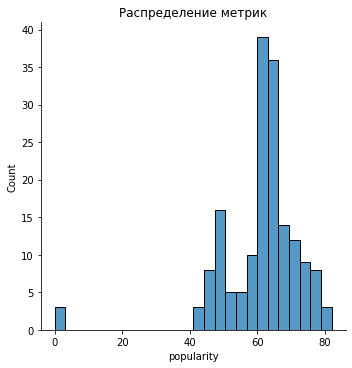

In [140]:
my_basic_research(df = df, column = 'popularity')

Мы видим, что **коэффициент эксцесса (КЭ)** сильно больше 1, график остроконечный. **Коэффициент асимметрии (КА)** меньше 0, есть смещение в левую сторону.

Text(0.5, 1.0, 'QQplot')

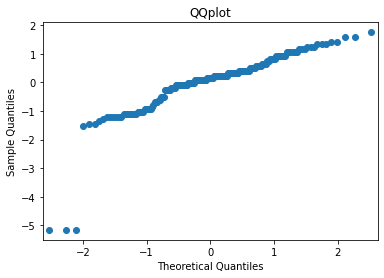

In [141]:
sm.qqplot(df['popularity'], fit = True)
plt.title('QQplot')

Необходимо нормализовать данные. Логарифм взять не можем, поскольку у нас есть нулевые значения, попробуем возвести в квадрат.

In [142]:
df['popularity_sq'] = df['popularity'] ** 2

Text(0.5, 1.0, 'QQplot')

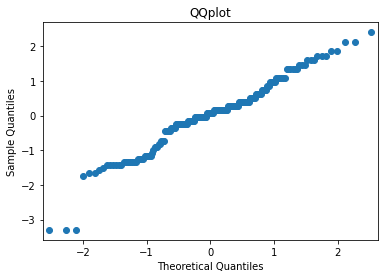

In [143]:
sm.qqplot(df['popularity_sq'], fit = True)
plt.title('QQplot')

Базовые метрики: 
count     171.000000
mean     3889.766082
std      1182.111572
min         0.000000
25%      3364.000000
50%      3969.000000
75%      4489.000000
max      6724.000000
Name: popularity_sq, dtype: float64
 ------------------ 
Самые популярные значения метрики - топ-5
4096    15
3844    12
4225    11
3600    11
4356    10
Name: popularity_sq, dtype: int64
 ------------------ 
КЭ 0.8632607953957527
КА -0.42378268307760364


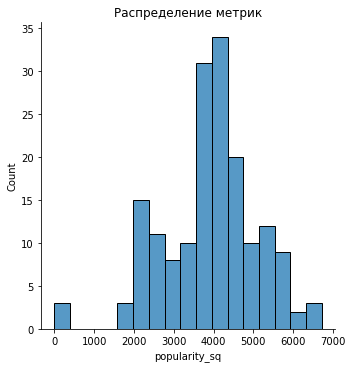

In [144]:
my_basic_research(df = df, column = 'popularity_sq')

Теперь **коэффициент эксцесса (КЭ)** чуть меньше 1. **Коэффициент асимметрии (КА)** так же меньше 0, но уже менее значительно, есть небольшое смещение в левую сторону.

Перейдем к построению **доверительного интервала** при уровне доверия 99%. 

In [145]:
def my_norm_confidence(df = df, column = 'popularity_sq', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Выведем границы интервала.

In [146]:
my_norm_confidence()

(844.8484548308461, 6934.683708911844)

In [147]:
confidence = my_norm_confidence()

Построим график, на котором будут наглядно видны границы нашего доверительного интервала и значения, которые попадают в него и которые находятся за его пределами.

Text(0.5, 1.0, 'Доверительный интервал')

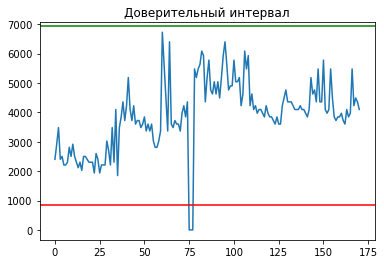

In [148]:
df['popularity_sq'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
# 1 - верхняя граница, 0 - нижняя граница
plt.title('Доверительный интервал')

Как мы можем видеть, данный график показывает, что у нас есть значения популярности (ее квадрата), которые находятся за пределами нижней границы доверительного интервала. Превышения верхней границы мы не наблюдаем.

Посмотрим, сколько значений являются выбросами (только по нижней границе, поскольку по верхней выбросов нет).

In [149]:
df['anomaly_small'] = np.where(df['popularity_sq'] < confidence[0], 1, 0)
df[df['anomaly_small'] == 1].describe()

№         length  popularity  danceability  acousticness    energy  \
count   3.0       3.000000         3.0      3.000000      3.000000  3.000000   
mean   76.0  151550.666667         0.0      0.682667      0.782333  0.239667   
std     1.0   57377.693717         0.0      0.094733      0.058287  0.114605   
min    75.0  107133.000000         0.0      0.592000      0.717000  0.128000   
25%    75.5  119159.500000         0.0      0.633500      0.759000  0.181000   
50%    76.0  131186.000000         0.0      0.675000      0.801000  0.234000   
75%    76.5  173759.500000         0.0      0.728000      0.815000  0.295500   
max    77.0  216333.000000         0.0      0.781000      0.829000  0.357000   

       instrumentalness  liveness   loudness  speechiness  ...       tempo  \
count               3.0  3.000000   3.000000     3.000000  ...    3.000000   
mean                0.0  0.456333 -16.463333     0.740667  ...  108.147000   
std                 0.0  0.243806   1.435257     0.162396  ...   25.784849   
min                 0.0  0.185000 -17.932000     0.589000  ...   78.828000   
25%                 0.0  0.356000 -17.163000     0.655000  ...   98.572500   
50%                 0.0  0.527000 -16.394000     0.721000  ...  118.317000   
75%                 0.0  0.592000 -15.729000     0.816500  ...  122.806500   
max                 0.0  0.657000 -15.064000     0.912000  ...  127.296000   

       long_song  most_popular  party  length_sec   z_score  Anomaly_big  \
count        3.0           3.0    3.0    3.000000  3.000000          3.0   
mean         0.0           0.0    0.0  151.333333 -5.158355          0.0   
std          0.0           0.0    0.0   57.274194  0.000000          0.0   
min          0.0           0.0    0.0  107.000000 -5.158355          0.0   
25%          0.0           0.0    0.0  119.000000 -5.158355          0.0   
50%          0.0           0.0    0.0  131.000000 -5.158355          0.0   
75%          0.0           0.0    0.0  173.500000 -5.158355          0.0   
max          0.0           0.0    0.0  216.000000 -5.158355          0.0   

       Anomaly_small  popularity_sq  anomaly_small  
count            3.0            3.0            3.0  
mean             1.0            0.0            1.0  
std              0.0            0.0            0.0  
min              1.0            0.0            1.0  
25%              1.0            0.0            1.0  
50%              1.0            0.0            1.0  
75%              1.0            0.0            1.0  
max              1.0            0.0            1.0  

[8 rows x 21 columns]

Видим, что **count = 3**, следовательно, данный способ выявил 3 выброса. Посмотрим, что это за значения.

In [150]:
df[df['anomaly_small'] == 1][:]

№                           name          album release_date  length  \
75  75     I Know Places - Voice Memo  1989 (Deluxe)   2014-01-01  216333   
76  76  I Wish You Would - Voice Memo  1989 (Deluxe)   2014-01-01  107133   
77  77       Blank Space - Voice Memo  1989 (Deluxe)   2014-01-01  131186   

    popularity  danceability  acousticness  energy  instrumentalness  ...  \
75           0         0.592         0.829   0.128               0.0  ...   
76           0         0.781         0.717   0.357               0.0  ...   
77           0         0.675         0.801   0.234               0.0  ...   

    long_song       danceability_cat  most_popular  party  length_sec  \
75          0  умеренно-танцевальная             0      0         216   
76          0  наиболее танцевальная             0      0         107   
77          0  наиболее танцевальная             0      0         131   

     z_score Anomaly_big  Anomaly_small  popularity_sq  anomaly_small  
75 -5.158355           0              1              0              1  
76 -5.158355           0              1              0              1  
77 -5.158355           0              1              0              1  

[3 rows x 25 columns]

Так, выбросами снова были выявлены те же 3 песни с нулевой популярностью.

**ВЫВОД:** Таким образом, было принято решение о том, что выбросами будут считаться 3 песни: "I Know Places - Voice Memo", "I Wish You Would - Voice Memo" и "Blank Space - Voice Memo", поскольку они были выявлены во всех трех способах поиска выбросов. Стоит отметить, что нулевая популярность этих композиций связана с тем, что это не полноценные песни, а "бонусы" - это диктофонные записи, которые Тейлор Свифт сделала во время записывания треков I Know Places, I Wish You Would и Blank Space соответственно.

Удалим имеющиеся выбросы, перезаписав имеющийся датасет как датасет без выбросов, выявленных по методу 3-х среднеквадратических изменений.

In [151]:
df = df[df['popularity'] >= std_lower_level]

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 170
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   №                 168 non-null    int64         
 1   name              168 non-null    object        
 2   album             168 non-null    object        
 3   release_date      168 non-null    datetime64[ns]
 4   length            168 non-null    int64         
 5   popularity        168 non-null    int64         
 6   danceability      168 non-null    float64       
 7   acousticness      168 non-null    float64       
 8   energy            168 non-null    float64       
 9   instrumentalness  168 non-null    float64       
 10  liveness          168 non-null    float64       
 11  loudness          168 non-null    float64       
 12  speechiness       168 non-null    float64       
 13  valence           168 non-null    float64       
 14  tempo             168 non-

Теперь у нас 168 наблюдений (было 171, удалили 3).

## <font color = green> 6. Корреляция </font>

Сделаем обновленный датасет, оставив в нем только нужные переменные (убрали Z-оценки, границы интервалов и т.д.). Также мы не будем включать в этот датасет категориальные переменные, чтобы для них не считалась корреляция.

In [153]:
df_new = pd.DataFrame(df.loc[:, ['name', 'album', 'release_date', 'length_sec', 'popularity', 'danceability', 
                                 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                                 'speechiness', 'valence', 'tempo']])

In [154]:
df_new.head()

name         album release_date  \
0                                   Tim McGraw  Taylor Swift   2006-10-24   
1                              Picture To Burn  Taylor Swift   2006-10-24   
2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   2006-10-24   
3                        A Place in this World  Taylor Swift   2006-10-24   
4                                  Cold As You  Taylor Swift   2006-10-24   

   length_sec  popularity  danceability  acousticness  energy  \
0         232          49         0.580         0.575   0.491   
1         173          54         0.658         0.173   0.877   
2         203          59         0.621         0.288   0.417   
3         199          49         0.576         0.051   0.777   
4         239          50         0.418         0.217   0.482   

   instrumentalness  liveness  loudness  speechiness  valence    tempo  
0               0.0    0.1210    -6.462       0.0251    0.425   76.009  
1               0.0    0.0962    -2.098       0.0323    0.821  105.586  
2               0.0    0.1190    -6.941       0.0231    0.289   99.953  
3               0.0    0.3200    -2.881       0.0324    0.428  115.028  
4               0.0    0.1230    -5.769       0.0266    0.261  175.558

Построим **матрицу корреляции**.

In [155]:
corr_m = df_new.corr()
corr_m

length_sec  popularity  danceability  acousticness  \
length_sec          1.000000   -0.266520     -0.275619      0.095303   
popularity         -0.266520    1.000000      0.206527      0.013458   
danceability       -0.275619    0.206527      1.000000     -0.166213   
acousticness        0.095303    0.013458     -0.166213      1.000000   
energy             -0.190305   -0.058886      0.087331     -0.698151   
instrumentalness   -0.091346    0.032275     -0.050403      0.146517   
liveness           -0.047584   -0.146958     -0.056200     -0.188711   
loudness           -0.081273   -0.260964      0.052451     -0.740972   
speechiness        -0.321159    0.308866      0.154643     -0.023985   
valence            -0.416886    0.070943      0.373198     -0.240440   
tempo               0.005272   -0.086956     -0.237474     -0.123866   

                    energy  instrumentalness  liveness  loudness  speechiness  \
length_sec       -0.190305         -0.091346 -0.047584 -0.081273    -0.321159   
popularity       -0.058886          0.032275 -0.146958 -0.260964     0.308866   
danceability      0.087331         -0.050403 -0.056200  0.052451     0.154643   
acousticness     -0.698151          0.146517 -0.188711 -0.740972    -0.023985   
energy            1.000000         -0.004211  0.213659  0.777069     0.039502   
instrumentalness -0.004211          1.000000 -0.060804 -0.101635    -0.029490   
liveness          0.213659         -0.060804  1.000000  0.275840     0.005265   
loudness          0.777069         -0.101635  0.275840  1.000000    -0.112623   
speechiness       0.039502         -0.029490  0.005265 -0.112623     1.000000   
valence           0.509776          0.020753 -0.014499  0.339974     0.159491   
tempo             0.196562          0.042336  0.082079  0.153681     0.040969   

                   valence     tempo  
length_sec       -0.416886  0.005272  
popularity        0.070943 -0.086956  
danceability      0.373198 -0.237474  
acousticness     -0.240440 -0.123866  
energy            0.509776  0.196562  
instrumentalness  0.020753  0.042336  
liveness         -0.014499  0.082079  
loudness          0.339974  0.153681  
speechiness       0.159491  0.040969  
valence           1.000000 -0.017562  
tempo            -0.017562  1.000000

Построим **тепловую карту**, чтобы корреляции между переменными выглядели нагляднее.

<AxesSubplot:>

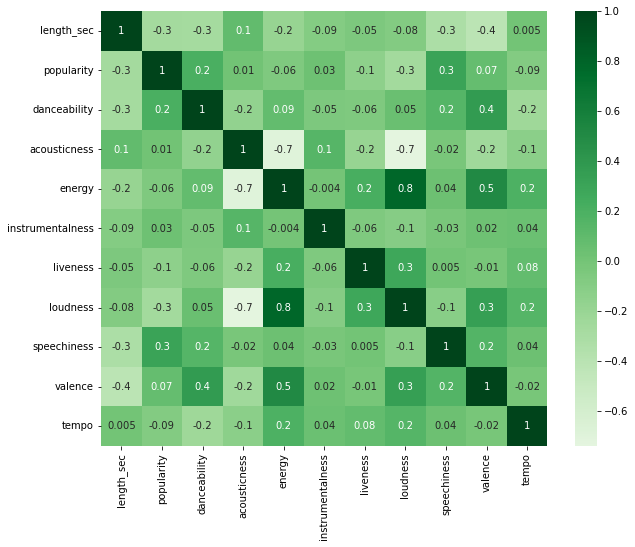

In [156]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_m, center = 0, cmap = 'Greens', annot = True, fmt = '.1g', linecolor = 'yellow')

Можно обратить внимание на корреляции между **loudness** и **energy**, **valence** и **energy**, а также на корреляции между **loudness** и **acousticness**, **energy** и **acousticness**.

Выведем отдельно корреляцию между **loudness** и **energy** и отобразим ее на графике.

In [157]:
df_new['loudness'].corr(df_new['energy'])

0.777068539161761

<AxesSubplot:xlabel='loudness', ylabel='energy'>

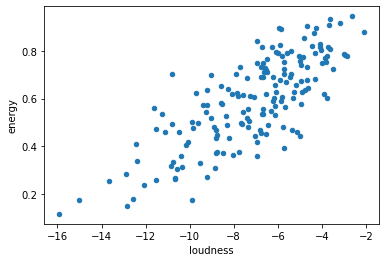

In [158]:
df_new.plot('loudness','energy', kind='scatter')

Диаграмма рассеяния говорит о **явной линейной зависимости**. Это достаточно логично, поскольку громкость песни может влиять на ее "субъективную" энергию - чем громче частоты у песни, тем более энергичной (интенсивной и активной) она ощущается.

Проделаем то же самое с переменными **valence** и **energy**.

In [159]:
df_new['valence'].corr(df_new['energy'])

0.5097759929848639

<AxesSubplot:xlabel='valence', ylabel='energy'>

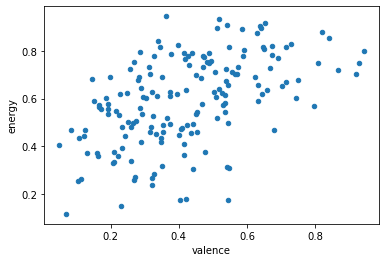

In [160]:
df_new.plot('valence','energy', kind='scatter')

Здесь мы уже не видим явную линейную зависимость, хотя она все же просматривается. Положительная корреляция позитивности песни и ее энергии логична.

Посмотрим корреляцию переменных **acousticness** и **energy**. Она отрицательная и достаточно сильная.

In [161]:
df_new['acousticness'].corr(df_new['energy'])

-0.6981512366800565

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

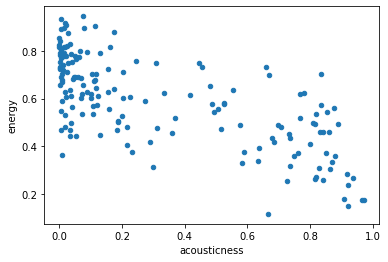

In [162]:
df_new.plot('acousticness','energy', kind='scatter')

Отрицательная зависимость заметна, даже в какой-то степени наблюдается линейность. Акустические песни обычно менее активные и интенсивные (хотя, конечно, не всегда), поэтому в целом результат с отрицательной корреляцией логичен.

Отрицательная зависимость заметна, даже в какой-то степени наблюдается линейность. Акустические песни обычно менее активные и интенсивные (хотя, конечно, не всегда), поэтому в целом результат с отрицательной корреляцией логичен.

Попытаемся упорядочить значения корреляции для переменных **energy** и **popularity**. В рамках энергии песни корреляционный анализ выявил интересные взаимосвязи, а взаимосвязь популярности с другими переменными интересовала нас изначально.Выведем их в формате датафрейма для удобства восприятия.

In [163]:
pd.DataFrame(df_new.corr()['energy'].sort_values(ascending = False))

energy
energy            1.000000
loudness          0.777069
valence           0.509776
liveness          0.213659
tempo             0.196562
danceability      0.087331
speechiness       0.039502
instrumentalness -0.004211
popularity       -0.058886
length_sec       -0.190305
acousticness     -0.698151

In [164]:
pd.DataFrame(df_new.corr()['energy'].apply(np.abs).sort_values(ascending = False))

energy
energy            1.000000
loudness          0.777069
acousticness      0.698151
valence           0.509776
liveness          0.213659
tempo             0.196562
length_sec        0.190305
danceability      0.087331
popularity        0.058886
speechiness       0.039502
instrumentalness  0.004211

Как мы можем видеть, наиболее сильная корреляция у переменной **energy** наблюдается с переменными **loudness**, **acousticness** и **valence**.

In [165]:
pd.DataFrame(df_new.corr()['popularity'].apply(np.abs).sort_values(ascending = False))

popularity
popularity          1.000000
speechiness         0.308866
length_sec          0.266520
loudness            0.260964
danceability        0.206527
liveness            0.146958
tempo               0.086956
valence             0.070943
energy              0.058886
instrumentalness    0.032275
acousticness        0.013458

У переменной **popularity** довольно слабая корреляция со всеми переменными. Чуть сильнее она наблюдается с переменной **speeciness**, но зависимость все равно слабая.

У переменной **popularity** довольно слабая корреляция со всеми переменными. Чуть сильнее она наблюдается с переменной **speeciness**, но зависимость все равно слабая.

Выведем таблицу, которая покажет нам **сортировку по наиболее сильным корреляциям (абсолютные значения)** между имеющимися переменными. Поскольку переменных много, они все не помещятся в одной таблице, поэтому мы просим программу показать наблюдения без учета корреляции переменной самой с собой (где corr=1), а также  просим показать до индекса 25, поскольку дальше корреляции уже идут достаточно слабые).

In [166]:
c1 = corr_m.abs().unstack()
pd.DataFrame(c1.sort_values(ascending = False).apply(np.abs).iloc[11:25])

0
loudness     energy        0.777069
energy       loudness      0.777069
loudness     acousticness  0.740972
acousticness loudness      0.740972
             energy        0.698151
energy       acousticness  0.698151
valence      energy        0.509776
energy       valence       0.509776
valence      length_sec    0.416886
length_sec   valence       0.416886
valence      danceability  0.373198
danceability valence       0.373198
loudness     valence       0.339974
valence      loudness      0.339974

## <font color = green> 7. Визуализация </font>

Сгруппируем данные так, чтобы посмотреть среднюю популярность песен по альбомам.

In [167]:
album_song_pop = df.groupby(df['album'])['popularity'].mean()
album_song_pop

album
1989 (Deluxe)                  64.625000
Evermore (Deluxe Version)      65.470588
Fearless (Taylor's Version)    65.576923
Folklore (Deluxe Version)      62.647059
Lover                          72.111111
Red (Deluxe Edition)           60.500000
Reputation                     71.866667
Speak Now (Deluxe Package)     49.727273
Taylor Swift                   50.133333
Name: popularity, dtype: float64

<BarContainer object of 9 artists>

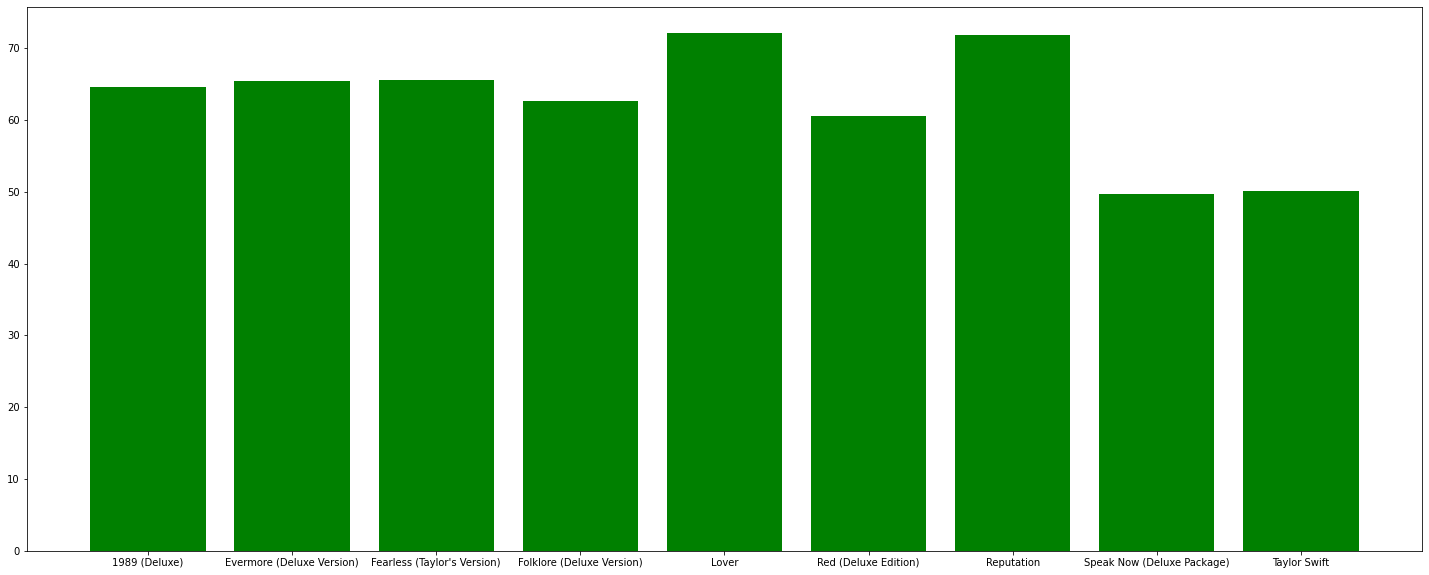

In [168]:
fig, ax = plt.subplots(figsize=(25,10))

ax.bar(album_song_pop.index, album_song_pop, color = 'g')

Столбчатая диаграмма показывает, что средний показатель популярности наиболее высокий в альбомах Lover и Reputation, а самый низкий - в альбомах Speak Now и Taylor Swift.

Посмотрим, **как изменялась средняя популярность песен в зависимости от года релиза альбома**.

In [169]:
popularity_mean = df.groupby(df['release_date'].dt.year)['popularity'].mean()

In [170]:
popularity_mean

release_date
2006    50.133333
2010    49.727273
2012    60.500000
2014    64.625000
2017    71.866667
2019    72.111111
2020    62.647059
2021    65.534884
Name: popularity, dtype: float64

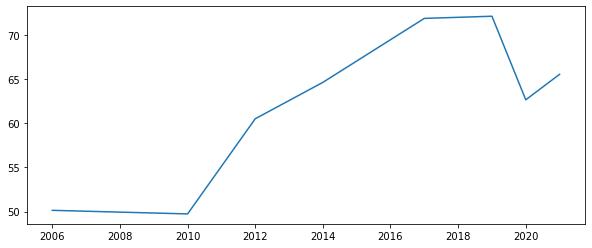

In [171]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(popularity_mean)

Как мы можем видеть, самые высокие средние значения популярности пришлись примерно на 2015-2019 годы. В то время Тейлор уже вернула всю свою дискографию на Spotify и продолжала продвигать альбом 1989 (выступления, синглы, музыкальные видео и т.д.), а позже выпустила альбомы Lover и Reputation.

Сделаем график, который покажет **длительность каждого альбома Тейлор Свифт** в секундах.

In [172]:
album_length = df.groupby('album')['length_sec'].sum()
album_length

album
1989 (Deluxe)                  3671
Evermore (Deluxe Version)      4145
Fearless (Taylor's Version)    6392
Folklore (Deluxe Version)      4030
Lover                          3708
Red (Deluxe Edition)           5441
Reputation                     3345
Speak Now (Deluxe Package)     6072
Taylor Swift                   3208
Name: length_sec, dtype: int64

In [173]:
album_length_list = album_length.index.to_list()
album_length_list

['1989 (Deluxe)',
 'Evermore (Deluxe Version)',
 "Fearless (Taylor's Version)",
 'Folklore (Deluxe Version)',
 'Lover',
 'Red (Deluxe Edition)',
 'Reputation',
 'Speak Now (Deluxe Package)',
 'Taylor Swift']

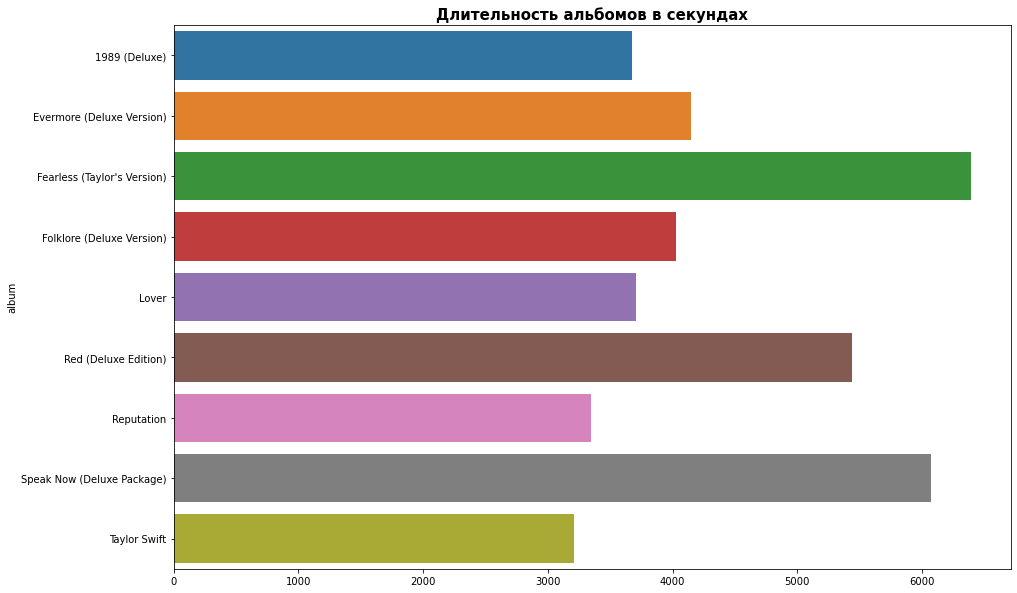

In [174]:
plt.figure(figsize = (15,10))
plt.title('Длительность альбомов в секундах', fontsize = 15, fontweight = 'bold')
sns.barplot(y = album_length.index, x = album_length.values, alpha = 1)
plt.tick_params(labelsize = 10)

In [175]:
df['album'].value_counts()

Fearless (Taylor's Version)    26
Speak Now (Deluxe Package)     22
Red (Deluxe Edition)           22
Lover                          18
Folklore (Deluxe Version)      17
Evermore (Deluxe Version)      17
1989 (Deluxe)                  16
Taylor Swift                   15
Reputation                     15
Name: album, dtype: int64

График показал, что самыми длинными альбомами являются Fearless, Red и Speak Now. Это подтверждается и лидерством данных альбомов по количеству песен (Fearless - 26, Red и Speak Now - по 22).

Другие графики не несут особого смысла в силу специфики данных.

## <font color = green> 8. Разведочный анализ данных </font>

Посмотроим график распределения длительности песен в секундах (переменная **length_sec**).

C:\Users\Maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_sec', ylabel='Density'>

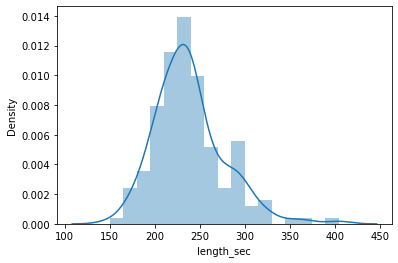

In [176]:
sns.distplot(df['length_sec'])

В одном из разделов мы отбирали **песни Тейлор Свифт, которые лучше всего подойдут для вечеринки**. Посмотрим на распределение переменной, которая отвечает за музыку на нашей вечеринке :)

In [177]:
df['party'].value_counts()

0    146
1     22
Name: party, dtype: int64

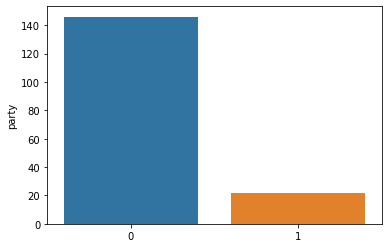

In [178]:
sns.barplot(x=df['party'].value_counts().index, y=df['party'].value_counts())
plt.show()

Теперь посмотрим, как распределяется степень позитивности у тех песен, которые мы выбрали для вечеринки, и у тех, которые нам не подошли. Построим **скрипичный график**.

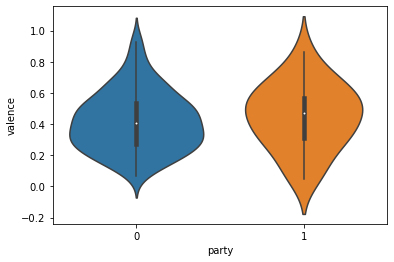

In [179]:
sns.violinplot(x=df['party'], y=df['valence'])
plt.show()

Мы видим, что среди тех песен, которые нам подошли, присутствуют все значения позитивности (причем есть сдвиг в более позитивную сторону), а среди тех, которые мы взяли, есть тяготение в сторону более грустных песен.

Построим **ящик-с-усами** для этого же распределения.

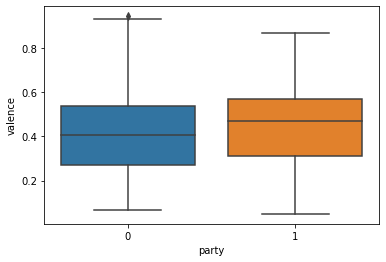

In [180]:
sns.boxplot(x=df['party'], y=df['valence'])
plt.show()

Данный график подтверждает, что **песни для вечеринки** имеют **чуть более высокий градус позитивности**. Также мы видим, что **среди песен, не подошедших для вечеринки**, есть один **выброс** (туда попала какая-то слишком позитивная песня для этой категории).

Полную **тепловую карту с корреляциями** мы уже строили в разделе Корреляция, поэтому в этом разделе в качестве примера возьмем лишь 5 переменных.

In [181]:
cols_num = ['popularity', 'length_sec', 'energy', 'loudness', 'valence']

In [182]:
correlation = df.corr().loc[cols_num, cols_num]

<AxesSubplot:>

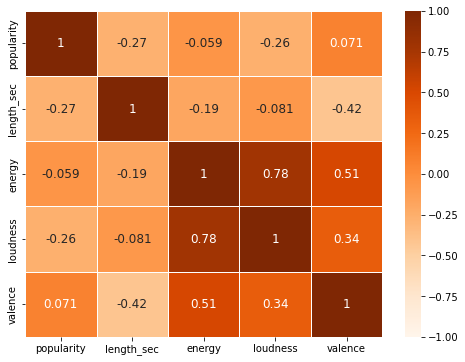

In [183]:
fig , ax = plt.subplots(figsize = (8,6))

sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='Oranges',
            linecolor="white", annot_kws = {'size':12})

Снова видим, что наиболее сильная корреляция наблюдается между переменными **energy** и **loudness**, а также между переменными **energy** и **valence**.

Теперь построим графики корреляции, которые будут выражены **матрицей рассеяния**.

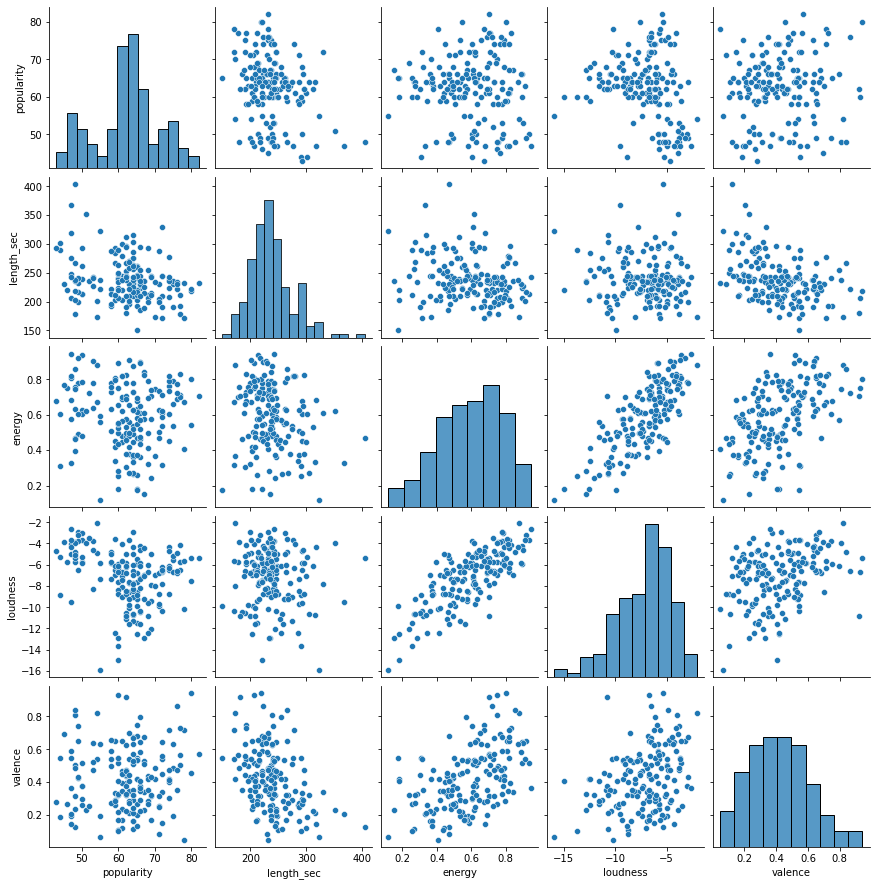

In [184]:
sns.pairplot(df[cols_num])

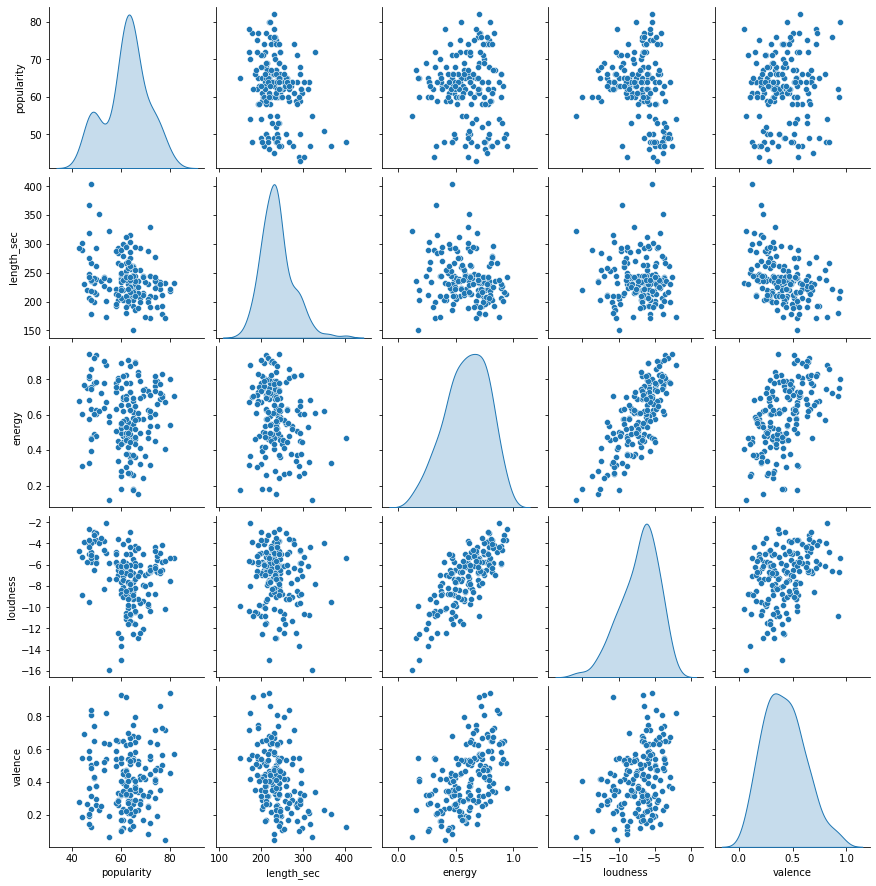

In [185]:
sns.pairplot(df[cols_num], diag_kind='kde')

Эти графики очень удобны, поскольку показывают сразу все переменные. Здесь мы снова видим наиболее ярко выраженную линейную зависимость между переменными **energy** и **loudness**.

Перейдем для построения графиков для категориальных переменных.

In [186]:
df['album'] = pd.Categorical(df['album'])

C:\Temp\ipykernel_29676\1963708712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['album'] = pd.Categorical(df['album'])


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 170
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   №                 168 non-null    int64         
 1   name              168 non-null    object        
 2   album             168 non-null    category      
 3   release_date      168 non-null    datetime64[ns]
 4   length            168 non-null    int64         
 5   popularity        168 non-null    int64         
 6   danceability      168 non-null    float64       
 7   acousticness      168 non-null    float64       
 8   energy            168 non-null    float64       
 9   instrumentalness  168 non-null    float64       
 10  liveness          168 non-null    float64       
 11  loudness          168 non-null    float64       
 12  speechiness       168 non-null    float64       
 13  valence           168 non-null    float64       
 14  tempo             168 non-

In [188]:
cat_features = ['album', 'danceability_cat', 'party', 'long_song']

In [189]:
df_melted = pd.melt(df, id_vars='popularity', value_vars=cat_features)
df_melted.head()

popularity variable         value
0          49    album  Taylor Swift
1          54    album  Taylor Swift
2          59    album  Taylor Swift
3          49    album  Taylor Swift
4          50    album  Taylor Swift

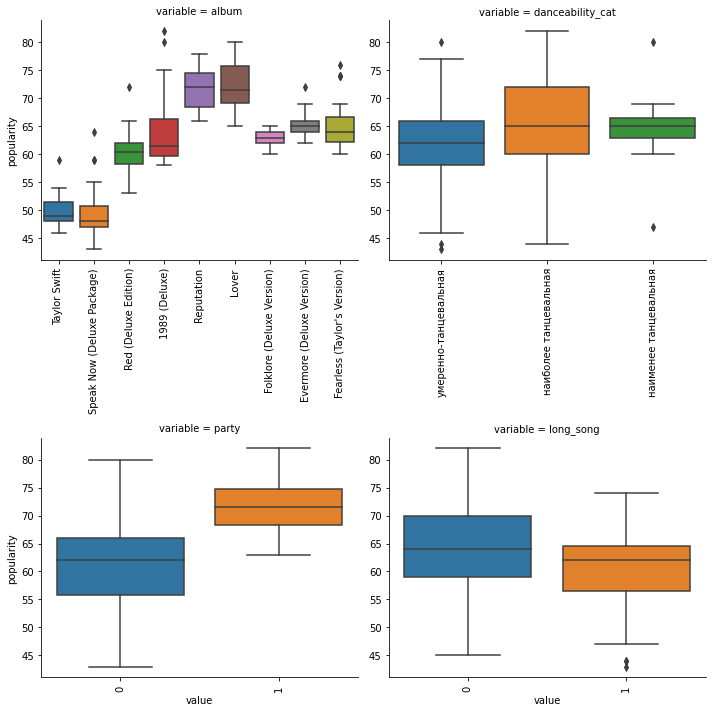

In [190]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col="variable",  
                  col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", 'popularity')

Так, мы можем видеть **распределения популярности песен в зависимости от заданных категорий**.
- На *первом* графике мы видим, что наиболее популярные песни находятся в альбомах Reputation и Lover.
- На *втором* графике мы видим, что самые популярные песни находятся в категории "наиболее танцевальные".
- На *третьем* графике мы видим, что самые популярные песни попали в категорию песен для вечеринок (в целом, это и было одним из условий формирования переменной **party**).
- На *четвертом* графике мы видим, что длинные песни в основном менее популярны, чем более короткие. 

## <font color = green> 9. Визуализация с Plotly </font>

**NOTE:** если графики в этом разделе не отображаются, нужно во вкладке Kernel нажать Restart & Run All.

In [191]:
!pip install plotly==4.14.3 
import plotly.graph_objects as go
import plotly.express as px

**Поработаем с песнями из альбома Lover**. В нашем датасете он является одним из самых популярных, поэтому интересно посмотреть данные по нему.

In [192]:
lover = df[df['album'] == 'Lover']

Построим график, который покажет нам, как песни из этого альбома распределились по популярности.

In [193]:
trace = go.Bar(x=lover['name'],
               y=lover['popularity'])

layout = go.Layout(title='Popularity of songs on Lover')
fig = go.Figure(data = trace, layout = layout)
fig

Мы видим, что самые популярные песни - это **Lover**, **You Need To Calm Down** и **ME!**. Это синглы, поэтому неудивительно, что они имеют большее количество прослушиваний. Также по популярности лидирует **Cruel Summer** - это песня не является синглом, но является одной из фаворитов у фанатов.

Сделаем подобный график, но в другом формате. В этом нет особого смысла, поскольку песни расположены просто в том порядке, в котором они расположены в альбоме. Тем не менее, можем построить график, чтобы посмотреть на функционал PLotly.

In [194]:
trace = go.Scatter(x=lover['name'],
               y=lover['popularity'])

layout = go.Layout(title='Popularity of songs on Lover',
                  yaxis={'range':[60,85]})
fig = go.Figure(data = trace, layout = layout)
fig

Теперь можем сделать график, добавив в него информацию еще по одному альбому. Например, по folklore.

In [195]:
folklore = df[df['album'] == 'Folklore (Deluxe Version)']

In [196]:
trace0 = go.Scatter(x=lover['name'],
                    y=lover['popularity'],
                    name='Lover')

trace1 = go.Scatter(x=folklore['name'],
                    y=folklore['popularity'],
                    name='folklore')

layout = go.Layout(title='Popularity of songs on Lover and folklore',
                  yaxis={'range':[50,90]})

fig = go.Figure(data = [trace0, trace1], layout = layout)
fig

Данный график тоже не несет особый смысловой контекст, но, опять же, мы протестировали функционал Plotly и построили 2 графика на одном.\
Если смотреть **по смыслу**, то мы можем сказать, что песни с альбома *Lover* популярнее песен с альбома *folklore*.

Построим **еще один график**, снова для песен из альбома Lover.

In [197]:
trace0 = go.Scatter(
    x = lover['danceability']*100,
    y = lover['popularity'],
    mode = 'markers',
    marker = dict(size = lover['popularity']/2,
                color = lover['danceability_cat'].cat.codes,
                opacity = 0.7,
                colorscale ='Viridis',
                showscale =False),
    text = lover['name'],
    hovertemplate =
    '<b>%{text}</b>' +
    '<br><i>Танцевальность</i>: %{x}' +
    '<br><i>Популярность</i>: %{y}',
    )

layout = go.Layout(title='The distribution of songs on Lover by their danceability & popularity',
                   xaxis=dict(
                        title='Danceability'),
                    yaxis=dict(
                        title='Popularity'))


fig = go.Figure(data = [trace0], layout = layout)
fig

- Так, мы можем видеть, что **бирюзовым** цветом выделены **наименее танцевальные** песни, **желтым** - **умеренно-танцевальные**, а **фиолетовым** - **наиболее танцевальные**. 
- При наведении курсора на каждый кружочек, можно увидеть **название песни, ее танцевальность и популярность**.

# <font color = green> *The End* </font>